In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# from imblearn.over_sampling import SMOTE

In [460]:
features = pd.read_excel(r'F:\\hackstat\\Variables Finalized - Insurance.xlsx')
# trainset = pd.read_excel(r'E:\\hackstat final round\\insurance_syn_hackathon_phase1.xlsx')
trainset1 = pd.read_csv(r'F:\\hackstat\\all.csv')
trainset2 = pd.read_csv(r'F:\\hackstat\\insurance_syn_hackathon_phase2.csv')

In [461]:
full_trainset = trainset1

In [462]:
print(features.shape)
features

(21, 2)


,Feature,Feature Description
0,ID,Record Identifier
1,TENURE_QUINTILES,Quintiles of policy tenure (snapshot date - co...
2,payment_pr1q_mean_diff_days,Average number of days between due and paid da...
3,payment_pr1q_num_payments,Number of payments in the past three months fr...
4,FUND_VALUE2,Fund value
5,Mode_Month,Payment frequency is monthly (0/1)
6,payment_pr1q_med_diff_days,Median of number of days between due and paid ...
7,payment_pr1q_sd_diff_days,Standard deviation of number of days between d...
8,payment_pr1q_num_past_due,Number of past-due payments in the past three ...
9,payment_pr1q_num_past_due_30d,Number of >30 days past-due payments in the pa...


In [463]:
print(full_trainset.shape)
full_trainset

(240032, 21)


,ID,TENURE_QUINTILES,payment_pr1q_mean_diff_days,payment_pr1q_num_payments,FUND_VALUE2,Mode_Month,payment_pr1q_med_diff_days,payment_pr1q_sd_diff_days,payment_pr1q_num_past_due,payment_pr1q_num_past_due_30d,...,COMMENCEMENT_MONTH,payment_pr1q_sd_pay_amt,ABC_ANNUAL_PREMIUM2,Mode_Quarter,age,payment_pr1q_sd_pay_date,NO_OF_CHILDREN2,TERM,Mode_Half,lapse_var
0,1,1,-4.151475,8.065577,-2.530957e+06,1,95.810812,52.960115,3.871131,1.0,...,5,-1540.834997,14847.775340,0,59.703765,6.927565,0.0,13.533617,0,0
1,2,2,-5.476620,4.935046,3.790000e+07,1,-20.876256,8.775671,4.037578,NaN,...,3,3050.669914,18127.102540,0,49.183609,-2.769722,0.0,13.750541,0,0
2,3,2,14.498615,5.499367,-2.550000e+07,1,52.123828,40.504105,0.947059,1.0,...,1,11687.537130,103898.557300,0,46.821003,8.148305,0.0,21.999173,0,0
3,4,0,23.824406,6.518387,6.667302e+06,1,40.171606,19.587609,4.033237,0.0,...,3,11349.370640,-64724.091480,0,29.872764,12.255236,0.0,24.802638,0,0
4,5,0,0.931913,1.775785,-9.972933e+06,1,-58.912534,8.756755,1.107156,1.0,...,9,8186.397688,-49111.528220,0,36.998385,4.362300,NaN,15.552943,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240027,300035,0,15.447571,1.173408,7.902722e+06,1,-5.684554,-1.649581,3.047634,0.0,...,5,3228.267349,-40527.124730,0,55.403409,14.983798,1.0,17.420433,0,0
240028,300036,1,116.038481,0.817222,1.370000e+07,1,64.333780,7.476007,-0.468213,0.0,...,7,30.404755,62046.099070,0,32.006575,7.383159,0.0,17.138226,0,0
240029,300037,2,26.359274,3.661044,3.449327e+05,1,104.755195,-19.749293,5.634498,1.0,...,8,5948.266210,54797.677260,0,34.526581,6.966327,NaN,19.674036,0,0
240030,300038,1,-36.088327,2.467479,-3.090000e+07,1,39.508509,13.109649,2.085475,0.0,...,3,-9510.648763,-12607.658360,1,36.400775,2.878763,0.0,17.857195,0,0


In [464]:
full_trainset.isnull().sum()

ID                                   0
TENURE_QUINTILES                     0
payment_pr1q_mean_diff_days          0
payment_pr1q_num_payments            0
FUND_VALUE2                          0
Mode_Month                           0
payment_pr1q_med_diff_days           0
payment_pr1q_sd_diff_days            0
payment_pr1q_num_past_due            0
payment_pr1q_num_past_due_30d    32430
Mode_Annual                          0
COMMENCEMENT_MONTH                   0
payment_pr1q_sd_pay_amt              0
ABC_ANNUAL_PREMIUM2                  0
Mode_Quarter                         0
age                                  0
payment_pr1q_sd_pay_date             0
NO_OF_CHILDREN2                  32250
TERM                                 0
Mode_Half                            0
lapse_var                            0
dtype: int64

In [465]:
mean_diff = full_trainset['payment_pr1q_mean_diff_days']
num_pay = full_trainset['payment_pr1q_num_payments']
fund = full_trainset['FUND_VALUE2']
med_diff = full_trainset['payment_pr1q_med_diff_days']
std_diff = full_trainset['payment_pr1q_sd_diff_days']
num_past_due = full_trainset['payment_pr1q_num_past_due']
sd_pay_amt = full_trainset['payment_pr1q_sd_pay_amt']
age_ = full_trainset['age']
ann_pre = full_trainset['ABC_ANNUAL_PREMIUM2']
sd_pay_date = full_trainset['payment_pr1q_sd_pay_date']
term_ = full_trainset['TERM']
children = full_trainset['NO_OF_CHILDREN2']

print("count_mean_diff",sum(n < 0 for n in mean_diff.values.flatten()))
print("count_num_pay",sum(n < 0 for n in num_pay.values.flatten()))
print("count_fund",sum(n < 0 for n in fund.values.flatten()))
print("count_med_diff",sum(n < 0 for n in med_diff.values.flatten()))
print("count_std_diff",sum(n < 0 for n in std_diff.values.flatten()))
print("count_num_past_due",sum(n < 0 for n in num_past_due.values.flatten()))
print("count_sd_pay_amt",sum(n < 0 for n in sd_pay_amt.values.flatten()))
print("age",sum(n < 0 for n in age_.values.flatten()))
print("count_ann_pre",sum(n < 0 for n in ann_pre.values.flatten()))
print("count_sd_pay_date",sum(n < 0 for n in sd_pay_date.values.flatten()))
print("term",sum(n < 0 for n in term_.values.flatten()))
print("No_children",sum(n < 0 for n in children.values.flatten()))

count_mean_diff 81487
count_num_pay 7164
count_fund 82735
count_med_diff 80565
count_std_diff 75664
count_num_past_due 8561
count_sd_pay_amt 102664
age 16
count_ann_pre 74198
count_sd_pay_date 43869
term 17
No_children 0


In [466]:
modes = full_trainset.iloc[:,[5,10,14,19]]
# Mode_Month,Mode_Quarter,Mode_Half,Mode_Annual
Mode_Month = full_trainset['Mode_Month']
Mode_Quarter = full_trainset['Mode_Quarter']
Mode_Half = full_trainset['Mode_Half']
Mode_Annual = full_trainset['Mode_Annual']
print(modes)

        Mode_Month  Mode_Annual  Mode_Quarter  Mode_Half
0                1            0             0          0
1                1            0             0          0
2                1            0             0          0
3                1            0             0          0
4                1            0             0          0
...            ...          ...           ...        ...
240027           1            0             0          0
240028           1            0             0          0
240029           1            0             0          0
240030           1            1             1          0
240031           0            0             0          0

[240032 rows x 4 columns]


In [467]:
count2 = 0
count3 = 0
for i in range(240032):
    count = 0
    if Mode_Month.values[i] == 1:
        count += 1
    if Mode_Quarter.values[i] == 1:
        count += 1
    if Mode_Half.values[i] == 1:
        count += 1
    if Mode_Annual.values[i] == 1:
        count += 1
    if count > 1:
        count2 += 1
    if count == 0:
        count3 += 1
print("more than one mode",count2) 
print("no modes",count3)

more than one mode 40733
no modes 43768


In [468]:
tenture_dummies = pd.get_dummies(full_trainset['TENURE_QUINTILES'])
tenture_dummies = tenture_dummies.rename(columns={0: "TENURE_QUINTILES_0", 1: "TENURE_QUINTILES_1", 2:"TENURE_QUINTILES_2", 3:"TENURE_QUINTILES_3"})
tenture_dummies

,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
240027,1,0,0,0
240028,0,1,0,0
240029,0,0,1,0
240030,0,1,0,0


In [469]:
COMMENCEMENT_MONTH_dummies = pd.get_dummies(full_trainset['COMMENCEMENT_MONTH'])
COMMENCEMENT_MONTH_dummies = COMMENCEMENT_MONTH_dummies.rename(columns={1: "Jan", 2: "Feb", 3:"Mar", 4:"Apr", 5:"May", 6: "Jun", 7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11: "Nov", 12:"Dec"})
COMMENCEMENT_MONTH_dummies

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
240027,0,0,0,0,1,0,0,0,0,0,0,0
240028,0,0,0,0,0,0,1,0,0,0,0,0
240029,0,0,0,0,0,0,0,1,0,0,0,0
240030,0,0,1,0,0,0,0,0,0,0,0,0


In [470]:
mode_list = []
count4 = 0
for i in range(240032):
    count = 0
    if Mode_Month.values[i] == 1 and Mode_Quarter.values[i] == 0 and Mode_Half.values[i] == 0 and Mode_Annual.values[i] == 0:
        mode_list += [0]
    elif Mode_Month.values[i] == 0 and Mode_Quarter.values[i] == 1 and Mode_Half.values[i] == 0 and Mode_Annual.values[i] == 0:
        mode_list += [1]
    elif Mode_Month.values[i] == 0 and Mode_Quarter.values[i] == 0 and Mode_Half.values[i] == 1 and Mode_Annual.values[i] == 0:
        mode_list += [2]
    elif Mode_Month.values[i] == 0 and Mode_Quarter.values[i] == 0 and Mode_Half.values[i] == 0 and Mode_Annual.values[i] == 1:
        mode_list += [3]
    else:
        mode_list += [-1]
        count4 += 1

print(mode_list) 
print(len(mode_list))
print("count4",count4)

[0, 0, 0, 0, 0, 0, -1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 1, 2, 0, -1, -1, 0, 0, 0, -1, 0, 0, 0, 0, -1, 2, -1, 0, 0, -1, -1, -1, 0, -1, 0, 0, -1, -1, 0, -1, 0, 0, -1, -1, 0, -1, 0, -1, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, -1, 0, 0, -1, -1, -1, -1, 0, 0, 0, 0, -1, -1, 0, 0, 0, -1, -1, 0, -1, 1, 0, 0, -1, 1, -1, -1, 0, 0, 0, 0, 0, -1, 1, -1, 0, 0, -1, -1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, -1, 0, -1, 0, 0, 1, -1, 0, 0, -1, 0, -1, 0, 0, -1, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, -1, -1, -1, 1, -1, 0, -1, -1, 0, 0, -1, 0, 0, -1, 2, 0, -1, 0, -1, 0, -1, 0, 0, -1, 0, 0, 0, -1, -1, 0, -1, -1, -1, -1, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, -1, 0, 0, -1, -1, -1, -1, 0, 0, -1, 0, 0, 0, -1, 0, 0, -1, -1, 0, 0, 0, 0, -1, -1, -1, -1, -1, -1, 0, 0, 0, 3, -1, 0, 0, 1, 0, -1, 0, 0, -1, 0, 0, 0, 0, 0, -1, -1, 0, -1, 0, -1, -1, 0, 0, 0, 0, 0, -1, 0, -1, -1, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, -1, -1, 0,

In [471]:
modes_dataframe = pd.DataFrame(mode_list, columns = ['modes']) 

In [472]:
modes_dataframe

,modes
0,0
1,0
2,0
3,0
4,0
...,...
240027,0
240028,0
240029,0
240030,-1


In [473]:
lapse_var = full_trainset['lapse_var']
one_hot_trainset = full_trainset.drop(['TENURE_QUINTILES','COMMENCEMENT_MONTH','lapse_var'], axis = 1)

In [474]:
one_hot_trainset = pd.concat([one_hot_trainset,tenture_dummies,COMMENCEMENT_MONTH_dummies,lapse_var] , axis = 1)
one_hot_trainset

,ID,payment_pr1q_mean_diff_days,payment_pr1q_num_payments,FUND_VALUE2,Mode_Month,payment_pr1q_med_diff_days,payment_pr1q_sd_diff_days,payment_pr1q_num_past_due,payment_pr1q_num_past_due_30d,Mode_Annual,...,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,lapse_var
0,1,-4.151475,8.065577,-2.530957e+06,1,95.810812,52.960115,3.871131,1.0,0,...,0,1,0,0,0,0,0,0,0,0
1,2,-5.476620,4.935046,3.790000e+07,1,-20.876256,8.775671,4.037578,NaN,0,...,0,0,0,0,0,0,0,0,0,0
2,3,14.498615,5.499367,-2.550000e+07,1,52.123828,40.504105,0.947059,1.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,23.824406,6.518387,6.667302e+06,1,40.171606,19.587609,4.033237,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0.931913,1.775785,-9.972933e+06,1,-58.912534,8.756755,1.107156,1.0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240027,300035,15.447571,1.173408,7.902722e+06,1,-5.684554,-1.649581,3.047634,0.0,0,...,0,1,0,0,0,0,0,0,0,0
240028,300036,116.038481,0.817222,1.370000e+07,1,64.333780,7.476007,-0.468213,0.0,0,...,0,0,0,1,0,0,0,0,0,0
240029,300037,26.359274,3.661044,3.449327e+05,1,104.755195,-19.749293,5.634498,1.0,0,...,0,0,0,0,1,0,0,0,0,0
240030,300038,-36.088327,2.467479,-3.090000e+07,1,39.508509,13.109649,2.085475,0.0,1,...,0,0,0,0,0,0,0,0,0,0


In [475]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy="most_frequent")
fill = imp.fit_transform(full_trainset.iloc[:,[9,17]])
nan_fill = pd.DataFrame({'payment_pr1q_num_past_due_30d': fill[:, 0], 'NO_OF_CHILDREN2': fill[:, 1]})
print(nan_fill)
# nan_fill.to_csv("E:\\nan_fill.csv", index = 0)

        payment_pr1q_num_past_due_30d  NO_OF_CHILDREN2
0                                 1.0              0.0
1                                 0.0              0.0
2                                 1.0              0.0
3                                 0.0              0.0
4                                 1.0              0.0
...                               ...              ...
240027                            0.0              1.0
240028                            0.0              0.0
240029                            1.0              0.0
240030                            0.0              0.0
240031                            0.0              0.0

[240032 rows x 2 columns]


In [456]:
# nans = pd.read_csv("E:\\nan_fill.csv")
# # df_nan_fill = pd.DataFrame(nan_fill)
# two_trainset = one_hot_trainset.drop(['payment_pr1q_num_past_due_30d', 'NO_OF_CHILDREN2', 'lapse_var'], axis=1)
# two_trainset

# one_hot_trainset.to_csv("E:\\one_hot_trainset.csv", index = 0)

In [477]:
one_hot_trainset.to_csv("E:\\one_hot_trainset1.csv", index = 0)
nan_fill.to_csv("E:\\nan_fill1.csv", index = 0)

In [4]:
trainset3 = pd.read_csv(r'F:\\hackstat\\one_hot_trainset1.csv')
trainset3
# new_one_trainset = pd.concat([nans,two_trainset], axis = 1)
# nan_fill.shape()

,ID,payment_pr1q_mean_diff_days,payment_pr1q_num_payments,FUND_VALUE2,Mode_Month,payment_pr1q_med_diff_days,payment_pr1q_sd_diff_days,payment_pr1q_num_past_due,payment_pr1q_num_past_due_30d,Mode_Annual,...,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,lapse_var
0,1,-4.151475,8.065577,-2.530957e+06,1,95.810812,52.960115,3.871131,1,0,...,0,1,0,0,0,0,0,0,0,0
1,2,-5.476620,4.935046,3.790000e+07,1,-20.876256,8.775671,4.037578,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,14.498615,5.499367,-2.550000e+07,1,52.123828,40.504105,0.947059,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,23.824406,6.518387,6.667302e+06,1,40.171606,19.587609,4.033237,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0.931913,1.775785,-9.972933e+06,1,-58.912534,8.756755,1.107156,1,0,...,0,0,0,0,0,1,0,0,0,0
5,6,-22.163258,2.688417,2.070000e+07,1,126.528610,42.478879,0.769801,1,0,...,0,0,0,0,0,1,0,0,0,0
6,7,52.431916,-0.272151,7.567418e+06,0,51.859362,-64.109020,3.877532,1,0,...,0,0,0,0,0,1,0,0,0,0
7,8,-17.336019,0.025436,2.580000e+07,1,52.567276,77.082352,0.455193,1,0,...,0,1,0,0,0,0,0,0,0,0
8,9,-17.728233,1.101131,-6.636662e+06,1,15.480426,-15.653784,3.004976,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,-18.548074,0.407311,4.787733e+06,0,-3.593384,3.788942,0.994515,1,0,...,0,0,0,0,0,0,0,0,0,0


In [484]:
primesh = pd.concat([trainset3,pd.DataFrame(mode_list)], axis = 1)
primesh.to_csv('E:\\primesh.csv')

In [14]:
to_predict_age_set = pd.concat([tenture_dummies,COMMENCEMENT_MONTH_dummies,trainset['lapse_var'],trainset['age']], axis = 1) 
to_predict_age_set

,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,lapse_var,age
0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,59.703765
1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,49.183609
2,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,46.821003
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,29.872764
4,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,36.998385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60002,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,29.838690
60003,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,48.442519
60004,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,61.568204
60005,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,39.878620


In [15]:
to_predict_age_train = to_predict_age_set[(to_predict_age_set >= 0).all(1)]
to_predict_age_train

,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,lapse_var,age
0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,59.703765
1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,49.183609
2,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,46.821003
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,29.872764
4,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,36.998385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60002,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,29.838690
60003,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,48.442519
60004,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,61.568204
60005,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,39.878620


In [16]:
to_predict_age_test = to_predict_age_set[(to_predict_age_set['age'] < 0)]
to_predict_age_test

,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,lapse_var,age
49153,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,-3.233938


In [17]:
age_regressor = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)
age_regressor.fit(to_predict_age_train.iloc[:,:17],to_predict_age_train['age'])
age_predict = age_regressor.predict(to_predict_age_test.iloc[:,:17])
print(age_predict)

[40.13417198]


In [18]:
to_predict_age_test.iloc[:,:17]

,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,lapse_var
49153,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [19]:
to_predict_age_set = to_predict_age_set.replace(-3.233937825,40.13417198)
to_predict_age_set

,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,lapse_var,age
0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,59.703765
1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,49.183609
2,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,46.821003
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,29.872764
4,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,36.998385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60002,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,29.838690
60003,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,48.442519
60004,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,61.568204
60005,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,39.878620


In [20]:
to_predict_term_set = pd.concat([trainset['ID'],to_predict_age_set,trainset['TERM']], axis = 1)

In [21]:
to_predict_term_set

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,lapse_var,age,TERM
0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,59.703765,13.533617
1,2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,49.183609,13.750541
2,3,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,46.821003,21.999173
3,4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,29.872764,24.802638
4,5,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,36.998385,15.552943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60002,60003,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,29.838690,21.835799
60003,60004,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,48.442519,18.919716
60004,60005,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,61.568204,34.112120
60005,60006,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,39.878620,20.903099


In [22]:
to_predict_term_set = to_predict_term_set.sort_values(by=['TERM'] ,ascending=False)
to_predict_term_set

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,lapse_var,age,TERM
25067,25068,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,41.872025,37.865735
25207,25208,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,40.787574,36.985427
55747,55748,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,49.547055,36.943550
29497,29498,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,38.780829,36.594508
1732,1733,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,36.253734,36.169877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40472,40473,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,46.708640,0.736267
10504,10505,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,66.621676,0.429468
33404,33405,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,48.147405,0.152490
678,679,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,47.101336,-1.694713


In [23]:
to_predict_term_train = to_predict_term_set.iloc[:60005, :]
to_predict_term_test = to_predict_term_set.iloc[60005:, :]
to_predict_term_train
to_predict_term_test

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,lapse_var,age,TERM
678,679,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,47.101336,-1.694713
51913,51914,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,11.996785,-3.101329


In [24]:
term_regressor = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)
term_regressor.fit(to_predict_term_train.iloc[:,1:19],to_predict_term_train['TERM'])
term_predict = term_regressor.predict(to_predict_term_test.iloc[:,1:19])
print(term_predict)

[18.04007784 18.09950643]


In [25]:
x = to_predict_term_test.iloc[:,:19]
x.insert(19,"TERM",term_predict,True)

In [26]:
x

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,lapse_var,age,TERM
678,679,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,47.101336,18.040078
51913,51914,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,11.996785,18.099506


In [27]:
term_set = pd.concat([to_predict_term_train,x], axis = 0)

In [28]:
term_set

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,lapse_var,age,TERM
25067,25068,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,41.872025,37.865735
25207,25208,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,40.787574,36.985427
55747,55748,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,49.547055,36.943550
29497,29498,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,38.780829,36.594508
1732,1733,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,36.253734,36.169877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40472,40473,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,46.708640,0.736267
10504,10505,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,66.621676,0.429468
33404,33405,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,48.147405,0.152490
678,679,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,47.101336,18.040078


In [29]:
term_set = term_set.sort_values(by=['ID'] ,ascending=True)

In [30]:
term_set

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,lapse_var,age,TERM
0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,59.703765,13.533617
1,2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,49.183609,13.750541
2,3,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,46.821003,21.999173
3,4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,29.872764,24.802638
4,5,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,36.998385,15.552943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60002,60003,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,29.838690,21.835799
60003,60004,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,48.442519,18.919716
60004,60005,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,61.568204,34.112120
60005,60006,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,39.878620,20.903099


In [31]:
to_predict_num_pay_set = pd.concat([term_set,trainset['payment_pr1q_num_payments']], axis = 1)

In [32]:
to_predict_num_pay_set

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,Jul,Aug,Sep,Oct,Nov,Dec,lapse_var,age,TERM,payment_pr1q_num_payments
0,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,59.703765,13.533617,8.065577
1,2,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,49.183609,13.750541,4.935046
2,3,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,46.821003,21.999173,5.499367
3,4,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,29.872764,24.802638,6.518387
4,5,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,36.998385,15.552943,1.775785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60002,60003,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,29.838690,21.835799,5.467595
60003,60004,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,48.442519,18.919716,1.947457
60004,60005,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,61.568204,34.112120,3.189202
60005,60006,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,39.878620,20.903099,3.412002


In [33]:
to_predict_num_pay_set = to_predict_num_pay_set.sort_values(by=['payment_pr1q_num_payments'] ,ascending=False)
to_predict_num_pay_set

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,Jul,Aug,Sep,Oct,Nov,Dec,lapse_var,age,TERM,payment_pr1q_num_payments
47287,47288,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,44.682135,17.395438,10.225401
9555,9556,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,33.611804,16.786523,10.033532
23161,23162,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,42.068183,17.618573,9.775329
23738,23739,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,36.224312,19.965108,9.759492
57916,57917,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,37.129568,11.499092,9.614640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24165,24166,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,58.178707,18.271640,-3.126880
34500,34501,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,47.154551,12.533312,-3.292246
33296,33297,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,44.469418,16.936407,-3.611677
40820,40821,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,28.765935,15.974005,-3.669242


In [34]:
to_predict_num_pay_train = to_predict_num_pay_set.iloc[:58186,:]
to_predict_num_pay_test = to_predict_num_pay_set.iloc[58186:,:]

In [35]:
to_predict_num_pay_test

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,Jul,Aug,Sep,Oct,Nov,Dec,lapse_var,age,TERM,payment_pr1q_num_payments
46380,46381,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,34.810806,12.092992,-0.000397
37076,37077,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,47.205249,11.773540,-0.000876
21065,21066,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,34.935316,15.839990,-0.000985
52613,52614,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,41.761993,13.830537,-0.002577
2264,2265,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,38.474023,20.637987,-0.002607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24165,24166,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,58.178707,18.271640,-3.126880
34500,34501,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,47.154551,12.533312,-3.292246
33296,33297,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,44.469418,16.936407,-3.611677
40820,40821,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,28.765935,15.974005,-3.669242


In [36]:
num_pay_regressor = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)
num_pay_regressor.fit(to_predict_num_pay_train.iloc[:,1:20],to_predict_num_pay_train['payment_pr1q_num_payments'])
num_pay_predict = num_pay_regressor.predict(to_predict_num_pay_test.iloc[:,1:20])
print(num_pay_predict)

[3.32057046 3.32068889 3.31299634 ... 3.32205846 3.3113612  3.32034808]


In [37]:
predicted_num_pay = to_predict_num_pay_test.iloc[:,:20]
predicted_num_pay.insert(20,"payment_pr1q_num_payments",num_pay_predict,True)
predicted_num_pay

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,Jul,Aug,Sep,Oct,Nov,Dec,lapse_var,age,TERM,payment_pr1q_num_payments
46380,46381,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,34.810806,12.092992,3.320570
37076,37077,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,47.205249,11.773540,3.320689
21065,21066,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,34.935316,15.839990,3.312996
52613,52614,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,41.761993,13.830537,3.313600
2264,2265,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,38.474023,20.637987,3.291313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24165,24166,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,58.178707,18.271640,3.321837
34500,34501,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,47.154551,12.533312,3.320091
33296,33297,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,44.469418,16.936407,3.322058
40820,40821,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,28.765935,15.974005,3.311361


In [38]:
num_pay_set = pd.concat([to_predict_num_pay_train,predicted_num_pay], axis = 0)
num_pay_set

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,Jul,Aug,Sep,Oct,Nov,Dec,lapse_var,age,TERM,payment_pr1q_num_payments
47287,47288,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,44.682135,17.395438,10.225401
9555,9556,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,33.611804,16.786523,10.033532
23161,23162,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,42.068183,17.618573,9.775329
23738,23739,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,36.224312,19.965108,9.759492
57916,57917,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,37.129568,11.499092,9.614640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24165,24166,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,58.178707,18.271640,3.321837
34500,34501,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,47.154551,12.533312,3.320091
33296,33297,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,44.469418,16.936407,3.322058
40820,40821,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,28.765935,15.974005,3.311361


In [39]:
num_pay_set = num_pay_set.sort_values(by=['ID'] ,ascending=True)

In [40]:
num_pay_set

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,Jul,Aug,Sep,Oct,Nov,Dec,lapse_var,age,TERM,payment_pr1q_num_payments
0,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,59.703765,13.533617,8.065577
1,2,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,49.183609,13.750541,4.935046
2,3,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,46.821003,21.999173,5.499367
3,4,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,29.872764,24.802638,6.518387
4,5,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,36.998385,15.552943,1.775785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60002,60003,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,29.838690,21.835799,5.467595
60003,60004,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,48.442519,18.919716,1.947457
60004,60005,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,61.568204,34.112120,3.189202
60005,60006,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,39.878620,20.903099,3.412002


In [41]:
to_predict_num_past_due_set = pd.concat([num_pay_set,trainset['payment_pr1q_num_past_due']], axis = 1)
to_predict_num_past_due_set

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,Aug,Sep,Oct,Nov,Dec,lapse_var,age,TERM,payment_pr1q_num_payments,payment_pr1q_num_past_due
0,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,59.703765,13.533617,8.065577,3.871131
1,2,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,49.183609,13.750541,4.935046,4.037578
2,3,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,46.821003,21.999173,5.499367,0.947059
3,4,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,29.872764,24.802638,6.518387,4.033237
4,5,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,36.998385,15.552943,1.775785,1.107156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60002,60003,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,29.838690,21.835799,5.467595,4.136871
60003,60004,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,48.442519,18.919716,1.947457,1.068679
60004,60005,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,61.568204,34.112120,3.189202,3.648770
60005,60006,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,39.878620,20.903099,3.412002,0.487497


In [42]:
to_predict_num_past_due_set = to_predict_num_past_due_set.sort_values(by=['payment_pr1q_num_past_due'] ,ascending=False)
to_predict_num_past_due_set

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,Aug,Sep,Oct,Nov,Dec,lapse_var,age,TERM,payment_pr1q_num_payments,payment_pr1q_num_past_due
54957,54958,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,34.279514,14.784225,1.152672,8.467419
3931,3932,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,34.927538,11.427527,3.007757,8.230420
36574,36575,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,68.049433,21.075729,2.340040,7.742640
51807,51808,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,31.586222,17.900362,2.363338,7.507503
37150,37151,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,25.102116,18.031880,4.334624,7.500541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59894,59895,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,34.744244,19.215160,4.924017,-2.497594
608,609,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,41.843171,15.289323,2.277394,-2.544500
47521,47522,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,46.842465,10.623747,0.213770,-2.570411
54498,54499,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,42.229409,24.872676,5.691211,-2.576872


In [43]:
to_predict_num_past_due_train = to_predict_num_past_due_set.iloc[:57902,:]
to_predict_num_past_due_test = to_predict_num_past_due_set.iloc[57902:,:]
to_predict_num_past_due_test

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,Aug,Sep,Oct,Nov,Dec,lapse_var,age,TERM,payment_pr1q_num_payments,payment_pr1q_num_past_due
5401,5402,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,46.105363,11.909976,3.872743,-0.000573
21254,21255,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,39.531037,21.690994,0.737044,-0.000587
20205,20206,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,20.893923,17.532908,3.728046,-0.001111
34760,34761,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,32.168495,31.449516,4.559796,-0.001328
46033,46034,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,50.314270,18.864642,4.840172,-0.001405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59894,59895,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,34.744244,19.215160,4.924017,-2.497594
608,609,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,41.843171,15.289323,2.277394,-2.544500
47521,47522,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,46.842465,10.623747,0.213770,-2.570411
54498,54499,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,42.229409,24.872676,5.691211,-2.576872


In [44]:
num_past_due_regressor = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)
num_past_due_regressor.fit(to_predict_num_past_due_train.iloc[:,1:21],to_predict_num_past_due_train['payment_pr1q_num_payments'])
num_past_due_predict = num_past_due_regressor.predict(to_predict_num_past_due_test.iloc[:,1:21])
print(num_past_due_predict)

[3.93799852 0.79282087 3.75565685 ... 0.17614128 5.715137   3.32118436]


In [45]:
predicted_num_past_due = to_predict_num_past_due_test.iloc[:,:21]
predicted_num_past_due.insert(21,"payment_pr1q_num_past_due",num_past_due_predict,True)
predicted_num_past_due

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,Aug,Sep,Oct,Nov,Dec,lapse_var,age,TERM,payment_pr1q_num_payments,payment_pr1q_num_past_due
5401,5402,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,46.105363,11.909976,3.872743,3.937999
21254,21255,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,39.531037,21.690994,0.737044,0.792821
20205,20206,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,20.893923,17.532908,3.728046,3.755657
34760,34761,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,32.168495,31.449516,4.559796,4.518866
46033,46034,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,50.314270,18.864642,4.840172,4.889248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59894,59895,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,34.744244,19.215160,4.924017,4.928766
608,609,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,41.843171,15.289323,2.277394,2.348299
47521,47522,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,46.842465,10.623747,0.213770,0.176141
54498,54499,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,42.229409,24.872676,5.691211,5.715137


In [46]:
num_past_due_set = pd.concat([to_predict_num_past_due_train,predicted_num_past_due], axis = 0)
num_past_due_set

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,Aug,Sep,Oct,Nov,Dec,lapse_var,age,TERM,payment_pr1q_num_payments,payment_pr1q_num_past_due
54957,54958,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,34.279514,14.784225,1.152672,8.467419
3931,3932,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,34.927538,11.427527,3.007757,8.230420
36574,36575,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,68.049433,21.075729,2.340040,7.742640
51807,51808,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,31.586222,17.900362,2.363338,7.507503
37150,37151,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,25.102116,18.031880,4.334624,7.500541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59894,59895,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,34.744244,19.215160,4.924017,4.928766
608,609,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,41.843171,15.289323,2.277394,2.348299
47521,47522,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,46.842465,10.623747,0.213770,0.176141
54498,54499,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,42.229409,24.872676,5.691211,5.715137


In [47]:
num_past_due_set = num_past_due_set.sort_values(by=['ID'] ,ascending=True)
num_past_due_set

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,Aug,Sep,Oct,Nov,Dec,lapse_var,age,TERM,payment_pr1q_num_payments,payment_pr1q_num_past_due
0,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,59.703765,13.533617,8.065577,3.871131
1,2,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,49.183609,13.750541,4.935046,4.037578
2,3,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,46.821003,21.999173,5.499367,0.947059
3,4,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,29.872764,24.802638,6.518387,4.033237
4,5,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,36.998385,15.552943,1.775785,1.107156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60002,60003,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,29.838690,21.835799,5.467595,4.136871
60003,60004,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,48.442519,18.919716,1.947457,1.068679
60004,60005,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,61.568204,34.112120,3.189202,3.648770
60005,60006,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,39.878620,20.903099,3.412002,0.487497


In [48]:
to_predict_sd_pay_date_set = pd.concat([num_past_due_set,trainset['payment_pr1q_sd_pay_date']], axis = 1)
to_predict_sd_pay_date_set

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,Sep,Oct,Nov,Dec,lapse_var,age,TERM,payment_pr1q_num_payments,payment_pr1q_num_past_due,payment_pr1q_sd_pay_date
0,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,59.703765,13.533617,8.065577,3.871131,6.927565
1,2,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,49.183609,13.750541,4.935046,4.037578,-2.769722
2,3,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,46.821003,21.999173,5.499367,0.947059,8.148305
3,4,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,29.872764,24.802638,6.518387,4.033237,12.255236
4,5,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,36.998385,15.552943,1.775785,1.107156,4.362300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60002,60003,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,29.838690,21.835799,5.467595,4.136871,1.810030
60003,60004,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,48.442519,18.919716,1.947457,1.068679,2.280073
60004,60005,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,61.568204,34.112120,3.189202,3.648770,1.364022
60005,60006,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,39.878620,20.903099,3.412002,0.487497,7.729683


In [49]:
to_predict_sd_pay_date_set = to_predict_sd_pay_date_set.sort_values(by=['payment_pr1q_sd_pay_date'] ,ascending=False)
to_predict_sd_pay_date_set

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,Sep,Oct,Nov,Dec,lapse_var,age,TERM,payment_pr1q_num_payments,payment_pr1q_num_past_due,payment_pr1q_sd_pay_date
27724,27725,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,40.618050,22.284981,1.099903,2.307554,24.636257
18927,18928,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,56.713991,21.149635,4.645343,1.376545,24.293947
42484,42485,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,35.191358,17.431492,2.829229,0.581304,23.362553
1655,1656,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,54.804645,15.990847,1.299935,3.297000,23.196975
29307,29308,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,61.830483,18.937543,0.845458,2.490414,22.566850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28876,28877,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,43.958517,17.542639,1.366817,3.902686,-13.450821
54759,54760,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,58.004565,17.192209,3.454799,1.788398,-13.624125
33945,33946,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,50.042755,21.234518,2.976128,3.231980,-13.707421
40155,40156,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,51.955238,30.632487,6.902833,1.152622,-14.111644


In [50]:
to_predict_sd_pay_date_train = to_predict_sd_pay_date_set.iloc[:49050,:]
to_predict_sd_pay_date_test = to_predict_sd_pay_date_set.iloc[49050:,:]
to_predict_sd_pay_date_test

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,Sep,Oct,Nov,Dec,lapse_var,age,TERM,payment_pr1q_num_payments,payment_pr1q_num_past_due,payment_pr1q_sd_pay_date
35938,35939,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,39.515555,18.326266,5.293859,2.593691,-0.000687
7704,7705,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,49.829733,19.470416,3.136103,3.784079,-0.000770
4342,4343,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,30.969414,20.180406,2.872071,3.295386,-0.000780
5526,5527,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,30.954021,13.228661,3.925673,4.242788,-0.001037
40345,40346,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,29.505033,12.498022,1.244963,3.940798,-0.001266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28876,28877,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,43.958517,17.542639,1.366817,3.902686,-13.450821
54759,54760,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,58.004565,17.192209,3.454799,1.788398,-13.624125
33945,33946,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,50.042755,21.234518,2.976128,3.231980,-13.707421
40155,40156,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,51.955238,30.632487,6.902833,1.152622,-14.111644


In [51]:
sd_pay_date_regressor = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)
sd_pay_date_regressor.fit(to_predict_sd_pay_date_train.iloc[:,1:22],to_predict_sd_pay_date_train['payment_pr1q_sd_pay_date'])
sd_pay_date_predict = sd_pay_date_regressor.predict(to_predict_sd_pay_date_test.iloc[:,1:22])
print(sd_pay_date_predict)

[5.71014905 5.71942023 5.75478309 ... 5.76059006 5.80578543 5.70973667]


In [52]:
predicted_sd_pay_date = to_predict_sd_pay_date_test.iloc[:,:22]
predicted_sd_pay_date.insert(22,"payment_pr1q_sd_pay_date",sd_pay_date_predict,True)
predicted_sd_pay_date

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,Sep,Oct,Nov,Dec,lapse_var,age,TERM,payment_pr1q_num_payments,payment_pr1q_num_past_due,payment_pr1q_sd_pay_date
35938,35939,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,39.515555,18.326266,5.293859,2.593691,5.710149
7704,7705,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,49.829733,19.470416,3.136103,3.784079,5.719420
4342,4343,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,30.969414,20.180406,2.872071,3.295386,5.754783
5526,5527,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,30.954021,13.228661,3.925673,4.242788,5.739366
40345,40346,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,29.505033,12.498022,1.244963,3.940798,5.718818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28876,28877,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,43.958517,17.542639,1.366817,3.902686,5.731210
54759,54760,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,58.004565,17.192209,3.454799,1.788398,5.562902
33945,33946,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,50.042755,21.234518,2.976128,3.231980,5.760590
40155,40156,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,51.955238,30.632487,6.902833,1.152622,5.805785


In [53]:
sd_pay_date_set = pd.concat([to_predict_sd_pay_date_train,predicted_sd_pay_date], axis = 0)
sd_pay_date_set

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,Sep,Oct,Nov,Dec,lapse_var,age,TERM,payment_pr1q_num_payments,payment_pr1q_num_past_due,payment_pr1q_sd_pay_date
27724,27725,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,40.618050,22.284981,1.099903,2.307554,24.636257
18927,18928,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,56.713991,21.149635,4.645343,1.376545,24.293947
42484,42485,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,35.191358,17.431492,2.829229,0.581304,23.362553
1655,1656,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,54.804645,15.990847,1.299935,3.297000,23.196975
29307,29308,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,61.830483,18.937543,0.845458,2.490414,22.566850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28876,28877,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,43.958517,17.542639,1.366817,3.902686,5.731210
54759,54760,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,58.004565,17.192209,3.454799,1.788398,5.562902
33945,33946,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,50.042755,21.234518,2.976128,3.231980,5.760590
40155,40156,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,51.955238,30.632487,6.902833,1.152622,5.805785


In [54]:
sd_pay_date_set = sd_pay_date_set.sort_values(by=['ID'] ,ascending=True)
sd_pay_date_set

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,Sep,Oct,Nov,Dec,lapse_var,age,TERM,payment_pr1q_num_payments,payment_pr1q_num_past_due,payment_pr1q_sd_pay_date
0,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,59.703765,13.533617,8.065577,3.871131,6.927565
1,2,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,49.183609,13.750541,4.935046,4.037578,5.751818
2,3,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,46.821003,21.999173,5.499367,0.947059,8.148305
3,4,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,29.872764,24.802638,6.518387,4.033237,12.255236
4,5,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,36.998385,15.552943,1.775785,1.107156,4.362300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60002,60003,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,29.838690,21.835799,5.467595,4.136871,1.810030
60003,60004,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,48.442519,18.919716,1.947457,1.068679,2.280073
60004,60005,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,61.568204,34.112120,3.189202,3.648770,1.364022
60005,60006,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,39.878620,20.903099,3.412002,0.487497,7.729683


In [55]:
to_predict_ann_pre_set = pd.concat([sd_pay_date_set,trainset['ABC_ANNUAL_PREMIUM2']], axis = 1)
to_predict_ann_pre_set

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,Oct,Nov,Dec,lapse_var,age,TERM,payment_pr1q_num_payments,payment_pr1q_num_past_due,payment_pr1q_sd_pay_date,ABC_ANNUAL_PREMIUM2
0,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,59.703765,13.533617,8.065577,3.871131,6.927565,14847.77534
1,2,0,0,1,0,0,0,1,0,0,...,0,0,0,0,49.183609,13.750541,4.935046,4.037578,5.751818,18127.10254
2,3,0,0,1,0,1,0,0,0,0,...,0,0,0,0,46.821003,21.999173,5.499367,0.947059,8.148305,103898.55730
3,4,1,0,0,0,0,0,1,0,0,...,0,0,0,0,29.872764,24.802638,6.518387,4.033237,12.255236,-64724.09148
4,5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,36.998385,15.552943,1.775785,1.107156,4.362300,-49111.52822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60002,60003,0,1,0,0,0,1,0,0,0,...,0,0,0,0,29.838690,21.835799,5.467595,4.136871,1.810030,180299.31340
60003,60004,0,0,0,1,0,0,0,0,0,...,0,0,0,0,48.442519,18.919716,1.947457,1.068679,2.280073,168677.03520
60004,60005,1,0,0,0,0,0,0,1,0,...,0,0,0,0,61.568204,34.112120,3.189202,3.648770,1.364022,72870.85922
60005,60006,0,1,0,0,0,0,0,0,0,...,0,0,0,0,39.878620,20.903099,3.412002,0.487497,7.729683,46153.08708


In [56]:
to_predict_ann_pre_set = to_predict_ann_pre_set.sort_values(by=['ABC_ANNUAL_PREMIUM2'] ,ascending=False)
to_predict_ann_pre_set

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,Oct,Nov,Dec,lapse_var,age,TERM,payment_pr1q_num_payments,payment_pr1q_num_past_due,payment_pr1q_sd_pay_date,ABC_ANNUAL_PREMIUM2
37934,37935,0,1,0,0,0,0,0,0,0,...,0,0,0,0,47.401064,22.405466,2.032853,3.486789,2.326154,348107.6590
44772,44773,0,0,1,0,0,0,0,0,0,...,0,0,0,0,31.734037,17.069874,5.574271,5.195457,6.463002,335474.5974
10715,10716,0,0,0,1,0,0,0,1,0,...,0,0,0,1,23.635570,19.605609,4.472474,1.478416,0.743294,334932.3048
35530,35531,1,0,0,0,0,0,0,0,0,...,0,0,0,0,18.810214,19.276480,4.363807,0.313211,4.206511,315230.4955
39348,39349,0,1,0,0,0,0,1,0,0,...,0,0,0,0,43.350989,24.752269,4.140687,1.669657,6.481269,308312.7569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19583,19584,0,1,0,0,0,0,1,0,0,...,0,0,0,0,47.510942,14.636962,1.140114,4.101580,3.252928,-232560.3670
15145,15146,0,0,1,0,0,0,0,0,0,...,0,0,0,0,32.550530,16.875012,4.934139,3.135345,0.919795,-234970.3543
38780,38781,0,1,0,0,0,0,0,0,0,...,0,0,0,0,34.102559,24.683851,0.583074,3.788214,5.098995,-239287.3370
31633,31634,1,0,0,0,0,0,0,0,0,...,0,0,0,0,40.375919,12.267755,2.597176,4.513946,5.719111,-258933.9609


In [57]:
to_predict_ann_pre_train = to_predict_ann_pre_set.iloc[:41342,:]
to_predict_ann_pre_test = to_predict_ann_pre_set.iloc[41342:,:]
to_predict_ann_pre_test

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,Oct,Nov,Dec,lapse_var,age,TERM,payment_pr1q_num_payments,payment_pr1q_num_past_due,payment_pr1q_sd_pay_date,ABC_ANNUAL_PREMIUM2
56709,56710,1,0,0,0,0,0,0,0,1,...,0,0,0,0,38.536148,13.678430,2.794795,4.493516,5.724672,-0.183590
24177,24178,0,0,0,1,0,0,0,1,0,...,0,0,0,0,41.464066,24.367584,4.735037,2.561799,8.937875,-0.586569
5349,5350,0,1,0,0,0,0,1,0,0,...,0,0,0,0,30.603399,17.171117,1.259095,3.791439,3.625234,-5.731533
49191,49192,0,1,0,0,0,1,0,0,0,...,0,0,0,0,67.942225,17.940133,3.315663,3.593173,1.696948,-17.452840
21026,21027,1,0,0,0,0,0,0,1,0,...,0,0,0,0,39.294726,19.893647,5.107574,1.930810,4.802616,-17.699351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19583,19584,0,1,0,0,0,0,1,0,0,...,0,0,0,0,47.510942,14.636962,1.140114,4.101580,3.252928,-232560.367000
15145,15146,0,0,1,0,0,0,0,0,0,...,0,0,0,0,32.550530,16.875012,4.934139,3.135345,0.919795,-234970.354300
38780,38781,0,1,0,0,0,0,0,0,0,...,0,0,0,0,34.102559,24.683851,0.583074,3.788214,5.098995,-239287.337000
31633,31634,1,0,0,0,0,0,0,0,0,...,0,0,0,0,40.375919,12.267755,2.597176,4.513946,5.719111,-258933.960900


In [58]:
ann_pre_regressor = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)
ann_pre_regressor.fit(to_predict_ann_pre_train.iloc[:,1:23],to_predict_ann_pre_train['ABC_ANNUAL_PREMIUM2'])
ann_pre_predict = ann_pre_regressor.predict(to_predict_ann_pre_test.iloc[:,1:23])
print(ann_pre_predict)

[67760.20792921 70012.5562774  68708.80631078 ... 68906.781756
 67863.30064612 68714.58418328]


In [59]:
predicted_ann_pre = to_predict_ann_pre_test.iloc[:,:23]
predicted_ann_pre.insert(23,"ABC_ANNUAL_PREMIUM2",ann_pre_predict,True)
predicted_ann_pre

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,Oct,Nov,Dec,lapse_var,age,TERM,payment_pr1q_num_payments,payment_pr1q_num_past_due,payment_pr1q_sd_pay_date,ABC_ANNUAL_PREMIUM2
56709,56710,1,0,0,0,0,0,0,0,1,...,0,0,0,0,38.536148,13.678430,2.794795,4.493516,5.724672,67760.207929
24177,24178,0,0,0,1,0,0,0,1,0,...,0,0,0,0,41.464066,24.367584,4.735037,2.561799,8.937875,70012.556277
5349,5350,0,1,0,0,0,0,1,0,0,...,0,0,0,0,30.603399,17.171117,1.259095,3.791439,3.625234,68708.806311
49191,49192,0,1,0,0,0,1,0,0,0,...,0,0,0,0,67.942225,17.940133,3.315663,3.593173,1.696948,69599.765626
21026,21027,1,0,0,0,0,0,0,1,0,...,0,0,0,0,39.294726,19.893647,5.107574,1.930810,4.802616,68594.885634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19583,19584,0,1,0,0,0,0,1,0,0,...,0,0,0,0,47.510942,14.636962,1.140114,4.101580,3.252928,68814.143116
15145,15146,0,0,1,0,0,0,0,0,0,...,0,0,0,0,32.550530,16.875012,4.934139,3.135345,0.919795,69356.226654
38780,38781,0,1,0,0,0,0,0,0,0,...,0,0,0,0,34.102559,24.683851,0.583074,3.788214,5.098995,68906.781756
31633,31634,1,0,0,0,0,0,0,0,0,...,0,0,0,0,40.375919,12.267755,2.597176,4.513946,5.719111,67863.300646


In [60]:
ann_pre_set = pd.concat([to_predict_ann_pre_train,predicted_ann_pre], axis = 0)
ann_pre_set

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,Oct,Nov,Dec,lapse_var,age,TERM,payment_pr1q_num_payments,payment_pr1q_num_past_due,payment_pr1q_sd_pay_date,ABC_ANNUAL_PREMIUM2
37934,37935,0,1,0,0,0,0,0,0,0,...,0,0,0,0,47.401064,22.405466,2.032853,3.486789,2.326154,348107.659000
44772,44773,0,0,1,0,0,0,0,0,0,...,0,0,0,0,31.734037,17.069874,5.574271,5.195457,6.463002,335474.597400
10715,10716,0,0,0,1,0,0,0,1,0,...,0,0,0,1,23.635570,19.605609,4.472474,1.478416,0.743294,334932.304800
35530,35531,1,0,0,0,0,0,0,0,0,...,0,0,0,0,18.810214,19.276480,4.363807,0.313211,4.206511,315230.495500
39348,39349,0,1,0,0,0,0,1,0,0,...,0,0,0,0,43.350989,24.752269,4.140687,1.669657,6.481269,308312.756900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19583,19584,0,1,0,0,0,0,1,0,0,...,0,0,0,0,47.510942,14.636962,1.140114,4.101580,3.252928,68814.143116
15145,15146,0,0,1,0,0,0,0,0,0,...,0,0,0,0,32.550530,16.875012,4.934139,3.135345,0.919795,69356.226654
38780,38781,0,1,0,0,0,0,0,0,0,...,0,0,0,0,34.102559,24.683851,0.583074,3.788214,5.098995,68906.781756
31633,31634,1,0,0,0,0,0,0,0,0,...,0,0,0,0,40.375919,12.267755,2.597176,4.513946,5.719111,67863.300646


In [61]:
ann_pre_set = ann_pre_set.sort_values(by=['ID'] ,ascending=True)
ann_pre_set

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,Oct,Nov,Dec,lapse_var,age,TERM,payment_pr1q_num_payments,payment_pr1q_num_past_due,payment_pr1q_sd_pay_date,ABC_ANNUAL_PREMIUM2
0,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,59.703765,13.533617,8.065577,3.871131,6.927565,14847.775340
1,2,0,0,1,0,0,0,1,0,0,...,0,0,0,0,49.183609,13.750541,4.935046,4.037578,5.751818,18127.102540
2,3,0,0,1,0,1,0,0,0,0,...,0,0,0,0,46.821003,21.999173,5.499367,0.947059,8.148305,103898.557300
3,4,1,0,0,0,0,0,1,0,0,...,0,0,0,0,29.872764,24.802638,6.518387,4.033237,12.255236,69416.253665
4,5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,36.998385,15.552943,1.775785,1.107156,4.362300,68452.107019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60002,60003,0,1,0,0,0,1,0,0,0,...,0,0,0,0,29.838690,21.835799,5.467595,4.136871,1.810030,180299.313400
60003,60004,0,0,0,1,0,0,0,0,0,...,0,0,0,0,48.442519,18.919716,1.947457,1.068679,2.280073,168677.035200
60004,60005,1,0,0,0,0,0,0,1,0,...,0,0,0,0,61.568204,34.112120,3.189202,3.648770,1.364022,72870.859220
60005,60006,0,1,0,0,0,0,0,0,0,...,0,0,0,0,39.878620,20.903099,3.412002,0.487497,7.729683,46153.087080


In [62]:
to_predict_sd_diff_days_set = pd.concat([ann_pre_set,trainset['payment_pr1q_sd_diff_days']], axis = 1)
to_predict_sd_diff_days_set

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,Nov,Dec,lapse_var,age,TERM,payment_pr1q_num_payments,payment_pr1q_num_past_due,payment_pr1q_sd_pay_date,ABC_ANNUAL_PREMIUM2,payment_pr1q_sd_diff_days
0,1,0,1,0,0,0,0,0,0,1,...,0,0,0,59.703765,13.533617,8.065577,3.871131,6.927565,14847.775340,52.960115
1,2,0,0,1,0,0,0,1,0,0,...,0,0,0,49.183609,13.750541,4.935046,4.037578,5.751818,18127.102540,8.775671
2,3,0,0,1,0,1,0,0,0,0,...,0,0,0,46.821003,21.999173,5.499367,0.947059,8.148305,103898.557300,40.504105
3,4,1,0,0,0,0,0,1,0,0,...,0,0,0,29.872764,24.802638,6.518387,4.033237,12.255236,69416.253665,19.587609
4,5,1,0,0,0,0,0,0,0,0,...,0,0,0,36.998385,15.552943,1.775785,1.107156,4.362300,68452.107019,8.756755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60002,60003,0,1,0,0,0,1,0,0,0,...,0,0,0,29.838690,21.835799,5.467595,4.136871,1.810030,180299.313400,-64.257195
60003,60004,0,0,0,1,0,0,0,0,0,...,0,0,0,48.442519,18.919716,1.947457,1.068679,2.280073,168677.035200,68.550539
60004,60005,1,0,0,0,0,0,0,1,0,...,0,0,0,61.568204,34.112120,3.189202,3.648770,1.364022,72870.859220,36.576560
60005,60006,0,1,0,0,0,0,0,0,0,...,0,0,0,39.878620,20.903099,3.412002,0.487497,7.729683,46153.087080,-60.096657


In [63]:
to_predict_sd_diff_days_set = to_predict_sd_diff_days_set.sort_values(by=['payment_pr1q_sd_diff_days'] ,ascending=False)
to_predict_sd_diff_days_set

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,Nov,Dec,lapse_var,age,TERM,payment_pr1q_num_payments,payment_pr1q_num_past_due,payment_pr1q_sd_pay_date,ABC_ANNUAL_PREMIUM2,payment_pr1q_sd_diff_days
21480,21481,1,0,0,0,0,0,0,0,0,...,0,0,0,39.383548,20.975645,1.833859,0.566916,3.243610,76696.324460,180.136415
58813,58814,0,1,0,0,0,0,0,0,0,...,0,0,0,69.324959,22.002780,2.333505,1.638716,2.123565,125563.821500,176.064326
51579,51580,0,0,1,0,0,0,0,0,0,...,0,0,0,44.178724,17.544458,3.151561,2.428612,4.093228,63257.966670,164.811812
38012,38013,0,0,1,0,0,0,0,1,0,...,0,0,0,38.725840,19.002299,3.195943,5.257319,4.889398,67830.349854,160.534179
32101,32102,1,0,0,0,0,0,0,0,0,...,0,0,0,63.400259,17.984503,2.404679,2.318109,2.430659,82750.570690,159.401577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50771,50772,0,1,0,0,0,0,0,0,1,...,0,0,0,40.707520,21.942262,2.992836,0.804223,3.618512,29563.270460,-119.454285
58694,58695,0,0,0,1,0,0,0,0,1,...,0,0,0,31.240680,18.698488,3.104265,3.223657,8.326586,150954.171300,-125.561245
8393,8394,1,0,0,0,0,0,0,0,0,...,0,0,1,42.925644,18.228960,2.999593,1.111899,12.044586,86208.074160,-128.272761
56107,56108,1,0,0,0,0,0,0,0,0,...,0,0,0,32.877196,20.439205,2.552500,1.085505,5.751085,20017.616650,-132.309200


In [64]:
to_predict_sd_diff_days_train = to_predict_sd_diff_days_set.iloc[:41005,:]
to_predict_sd_diff_days_test = to_predict_sd_diff_days_set.iloc[41005:,:]
to_predict_sd_diff_days_test

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,Nov,Dec,lapse_var,age,TERM,payment_pr1q_num_payments,payment_pr1q_num_past_due,payment_pr1q_sd_pay_date,ABC_ANNUAL_PREMIUM2,payment_pr1q_sd_diff_days
10332,10333,0,1,0,0,0,0,0,0,0,...,0,0,0,67.483507,9.379585,3.424648,0.776754,6.093231,68684.61946,-0.002618
28915,28916,1,0,0,0,0,0,0,0,0,...,1,0,0,41.314232,22.678432,2.966811,0.875197,4.634798,2743.33095,-0.003676
40091,40092,0,1,0,0,0,0,0,0,0,...,0,1,1,52.958189,18.235807,3.521111,4.347626,9.879909,78048.94497,-0.004030
59118,59119,0,1,0,0,1,0,0,0,0,...,0,0,0,36.782223,11.442492,4.088398,1.385271,8.384136,116691.90110,-0.004594
30261,30262,0,0,1,0,1,0,0,0,0,...,0,0,0,47.841599,19.589442,3.307236,2.493803,0.311274,45733.53922,-0.007102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50771,50772,0,1,0,0,0,0,0,0,1,...,0,0,0,40.707520,21.942262,2.992836,0.804223,3.618512,29563.27046,-119.454285
58694,58695,0,0,0,1,0,0,0,0,1,...,0,0,0,31.240680,18.698488,3.104265,3.223657,8.326586,150954.17130,-125.561245
8393,8394,1,0,0,0,0,0,0,0,0,...,0,0,1,42.925644,18.228960,2.999593,1.111899,12.044586,86208.07416,-128.272761
56107,56108,1,0,0,0,0,0,0,0,0,...,0,0,0,32.877196,20.439205,2.552500,1.085505,5.751085,20017.61665,-132.309200


In [65]:
sd_diff_days_regressor = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)
sd_diff_days_regressor.fit(to_predict_sd_diff_days_train.iloc[:,1:24],to_predict_sd_diff_days_train['payment_pr1q_sd_diff_days'])
sd_diff_days_predict = sd_diff_days_regressor.predict(to_predict_sd_diff_days_test.iloc[:,1:24])
print(sd_diff_days_predict)

[36.94368851 36.68556116 37.21742475 ... 36.66433136 36.51535464
 37.25556175]


In [66]:
predicted_sd_diff_days = to_predict_sd_diff_days_test.iloc[:,:24]
predicted_sd_diff_days.insert(24,"payment_pr1q_sd_diff_days",sd_diff_days_predict,True)
predicted_sd_diff_days

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,Nov,Dec,lapse_var,age,TERM,payment_pr1q_num_payments,payment_pr1q_num_past_due,payment_pr1q_sd_pay_date,ABC_ANNUAL_PREMIUM2,payment_pr1q_sd_diff_days
10332,10333,0,1,0,0,0,0,0,0,0,...,0,0,0,67.483507,9.379585,3.424648,0.776754,6.093231,68684.61946,36.943689
28915,28916,1,0,0,0,0,0,0,0,0,...,1,0,0,41.314232,22.678432,2.966811,0.875197,4.634798,2743.33095,36.685561
40091,40092,0,1,0,0,0,0,0,0,0,...,0,1,1,52.958189,18.235807,3.521111,4.347626,9.879909,78048.94497,37.217425
59118,59119,0,1,0,0,1,0,0,0,0,...,0,0,0,36.782223,11.442492,4.088398,1.385271,8.384136,116691.90110,36.932363
30261,30262,0,0,1,0,1,0,0,0,0,...,0,0,0,47.841599,19.589442,3.307236,2.493803,0.311274,45733.53922,37.668405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50771,50772,0,1,0,0,0,0,0,0,1,...,0,0,0,40.707520,21.942262,2.992836,0.804223,3.618512,29563.27046,36.969564
58694,58695,0,0,0,1,0,0,0,0,1,...,0,0,0,31.240680,18.698488,3.104265,3.223657,8.326586,150954.17130,36.852350
8393,8394,1,0,0,0,0,0,0,0,0,...,0,0,1,42.925644,18.228960,2.999593,1.111899,12.044586,86208.07416,36.664331
56107,56108,1,0,0,0,0,0,0,0,0,...,0,0,0,32.877196,20.439205,2.552500,1.085505,5.751085,20017.61665,36.515355


In [67]:
sd_diff_days_set = pd.concat([to_predict_sd_diff_days_train,predicted_sd_diff_days], axis = 0)
sd_diff_days_set

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,Nov,Dec,lapse_var,age,TERM,payment_pr1q_num_payments,payment_pr1q_num_past_due,payment_pr1q_sd_pay_date,ABC_ANNUAL_PREMIUM2,payment_pr1q_sd_diff_days
21480,21481,1,0,0,0,0,0,0,0,0,...,0,0,0,39.383548,20.975645,1.833859,0.566916,3.243610,76696.324460,180.136415
58813,58814,0,1,0,0,0,0,0,0,0,...,0,0,0,69.324959,22.002780,2.333505,1.638716,2.123565,125563.821500,176.064326
51579,51580,0,0,1,0,0,0,0,0,0,...,0,0,0,44.178724,17.544458,3.151561,2.428612,4.093228,63257.966670,164.811812
38012,38013,0,0,1,0,0,0,0,1,0,...,0,0,0,38.725840,19.002299,3.195943,5.257319,4.889398,67830.349854,160.534179
32101,32102,1,0,0,0,0,0,0,0,0,...,0,0,0,63.400259,17.984503,2.404679,2.318109,2.430659,82750.570690,159.401577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50771,50772,0,1,0,0,0,0,0,0,1,...,0,0,0,40.707520,21.942262,2.992836,0.804223,3.618512,29563.270460,36.969564
58694,58695,0,0,0,1,0,0,0,0,1,...,0,0,0,31.240680,18.698488,3.104265,3.223657,8.326586,150954.171300,36.852350
8393,8394,1,0,0,0,0,0,0,0,0,...,0,0,1,42.925644,18.228960,2.999593,1.111899,12.044586,86208.074160,36.664331
56107,56108,1,0,0,0,0,0,0,0,0,...,0,0,0,32.877196,20.439205,2.552500,1.085505,5.751085,20017.616650,36.515355


In [68]:
sd_diff_days_set = sd_diff_days_set.sort_values(by=['ID'] ,ascending=True)
sd_diff_days_set

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,Nov,Dec,lapse_var,age,TERM,payment_pr1q_num_payments,payment_pr1q_num_past_due,payment_pr1q_sd_pay_date,ABC_ANNUAL_PREMIUM2,payment_pr1q_sd_diff_days
0,1,0,1,0,0,0,0,0,0,1,...,0,0,0,59.703765,13.533617,8.065577,3.871131,6.927565,14847.775340,52.960115
1,2,0,0,1,0,0,0,1,0,0,...,0,0,0,49.183609,13.750541,4.935046,4.037578,5.751818,18127.102540,8.775671
2,3,0,0,1,0,1,0,0,0,0,...,0,0,0,46.821003,21.999173,5.499367,0.947059,8.148305,103898.557300,40.504105
3,4,1,0,0,0,0,0,1,0,0,...,0,0,0,29.872764,24.802638,6.518387,4.033237,12.255236,69416.253665,19.587609
4,5,1,0,0,0,0,0,0,0,0,...,0,0,0,36.998385,15.552943,1.775785,1.107156,4.362300,68452.107019,8.756755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60002,60003,0,1,0,0,0,1,0,0,0,...,0,0,0,29.838690,21.835799,5.467595,4.136871,1.810030,180299.313400,37.885844
60003,60004,0,0,0,1,0,0,0,0,0,...,0,0,0,48.442519,18.919716,1.947457,1.068679,2.280073,168677.035200,68.550539
60004,60005,1,0,0,0,0,0,0,1,0,...,0,0,0,61.568204,34.112120,3.189202,3.648770,1.364022,72870.859220,36.576560
60005,60006,0,1,0,0,0,0,0,0,0,...,0,0,0,39.878620,20.903099,3.412002,0.487497,7.729683,46153.087080,37.153049


In [69]:
to_predict_med_diff_days_set = pd.concat([sd_diff_days_set,trainset['payment_pr1q_med_diff_days']], axis = 1)
to_predict_med_diff_days_set

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,Dec,lapse_var,age,TERM,payment_pr1q_num_payments,payment_pr1q_num_past_due,payment_pr1q_sd_pay_date,ABC_ANNUAL_PREMIUM2,payment_pr1q_sd_diff_days,payment_pr1q_med_diff_days
0,1,0,1,0,0,0,0,0,0,1,...,0,0,59.703765,13.533617,8.065577,3.871131,6.927565,14847.775340,52.960115,95.810812
1,2,0,0,1,0,0,0,1,0,0,...,0,0,49.183609,13.750541,4.935046,4.037578,5.751818,18127.102540,8.775671,-20.876256
2,3,0,0,1,0,1,0,0,0,0,...,0,0,46.821003,21.999173,5.499367,0.947059,8.148305,103898.557300,40.504105,52.123828
3,4,1,0,0,0,0,0,1,0,0,...,0,0,29.872764,24.802638,6.518387,4.033237,12.255236,69416.253665,19.587609,40.171606
4,5,1,0,0,0,0,0,0,0,0,...,0,0,36.998385,15.552943,1.775785,1.107156,4.362300,68452.107019,8.756755,-58.912534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60002,60003,0,1,0,0,0,1,0,0,0,...,0,0,29.838690,21.835799,5.467595,4.136871,1.810030,180299.313400,37.885844,-37.119826
60003,60004,0,0,0,1,0,0,0,0,0,...,0,0,48.442519,18.919716,1.947457,1.068679,2.280073,168677.035200,68.550539,90.992461
60004,60005,1,0,0,0,0,0,0,1,0,...,0,0,61.568204,34.112120,3.189202,3.648770,1.364022,72870.859220,36.576560,97.129089
60005,60006,0,1,0,0,0,0,0,0,0,...,0,0,39.878620,20.903099,3.412002,0.487497,7.729683,46153.087080,37.153049,-24.414015


In [70]:
to_predict_med_diff_days_set = to_predict_med_diff_days_set.sort_values(by=['payment_pr1q_med_diff_days'] ,ascending=False)
to_predict_med_diff_days_set

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,Dec,lapse_var,age,TERM,payment_pr1q_num_payments,payment_pr1q_num_past_due,payment_pr1q_sd_pay_date,ABC_ANNUAL_PREMIUM2,payment_pr1q_sd_diff_days,payment_pr1q_med_diff_days
37159,37160,1,0,0,0,0,1,0,0,0,...,0,0,46.790184,23.671043,2.493111,3.754385,5.769970,84952.252430,36.965146,226.291197
58616,58617,0,1,0,0,0,0,0,0,0,...,0,0,45.451717,17.516823,3.530568,3.217514,5.726622,33017.209000,9.248200,226.138705
57570,57571,0,1,0,0,0,0,0,0,0,...,0,0,44.748724,29.517972,2.339716,0.926814,6.685820,68970.324398,37.654954,225.781992
45077,45078,1,0,0,0,0,0,0,0,0,...,0,0,18.385731,24.752907,3.031309,4.175384,0.525559,171663.962400,40.803209,221.106767
9373,9374,0,1,0,0,0,0,0,0,0,...,0,0,39.629512,21.253451,0.088257,2.651621,1.042502,51204.419980,37.761898,220.840043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43405,43406,0,1,0,0,0,0,0,0,0,...,0,0,52.913781,21.377850,1.090627,1.049892,11.263388,58006.858140,42.017061,-171.141769
6340,6341,1,0,0,0,0,0,0,0,0,...,0,0,63.262813,15.237058,1.234810,1.155558,4.041850,68604.083069,33.816591,-173.716651
9855,9856,1,0,0,0,0,0,0,0,0,...,0,0,40.309303,21.387211,0.875043,2.038140,0.995802,69281.689083,21.264983,-176.197529
25264,25265,0,1,0,0,0,0,0,0,0,...,0,0,33.000002,17.198928,3.695101,1.417173,1.804067,13187.652790,15.816989,-189.182200


In [71]:
to_predict_med_diff_days_train = to_predict_med_diff_days_set.iloc[:39791,:]
to_predict_med_diff_days_test = to_predict_med_diff_days_set.iloc[39791:,:]
to_predict_med_diff_days_test

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,Dec,lapse_var,age,TERM,payment_pr1q_num_payments,payment_pr1q_num_past_due,payment_pr1q_sd_pay_date,ABC_ANNUAL_PREMIUM2,payment_pr1q_sd_diff_days,payment_pr1q_med_diff_days
18655,18656,0,1,0,0,0,0,0,0,0,...,0,0,35.857665,8.456349,1.738932,0.583392,1.667953,105072.283600,37.373583,-0.007393
47765,47766,0,0,1,0,0,0,0,0,0,...,0,0,42.452852,20.792872,1.930033,5.605747,4.719955,24602.412490,53.149709,-0.008332
23243,23244,0,0,1,0,0,0,0,0,0,...,0,0,48.019163,19.077393,3.635634,2.089583,7.993426,58242.969260,37.267301,-0.010914
55454,55455,0,1,0,0,0,0,1,0,0,...,0,0,36.047019,21.293215,3.949688,2.743867,5.701114,56961.009650,38.633893,-0.012402
2664,2665,0,0,0,1,0,1,0,0,0,...,0,0,48.470199,25.584119,3.216122,3.155340,15.556504,83895.824850,24.695014,-0.015851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43405,43406,0,1,0,0,0,0,0,0,0,...,0,0,52.913781,21.377850,1.090627,1.049892,11.263388,58006.858140,42.017061,-171.141769
6340,6341,1,0,0,0,0,0,0,0,0,...,0,0,63.262813,15.237058,1.234810,1.155558,4.041850,68604.083069,33.816591,-173.716651
9855,9856,1,0,0,0,0,0,0,0,0,...,0,0,40.309303,21.387211,0.875043,2.038140,0.995802,69281.689083,21.264983,-176.197529
25264,25265,0,1,0,0,0,0,0,0,0,...,0,0,33.000002,17.198928,3.695101,1.417173,1.804067,13187.652790,15.816989,-189.182200


In [72]:
med_diff_days_regressor = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)
med_diff_days_regressor.fit(to_predict_med_diff_days_train.iloc[:,1:25],to_predict_med_diff_days_train['payment_pr1q_med_diff_days'])
med_diff_days_predict = med_diff_days_regressor.predict(to_predict_med_diff_days_test.iloc[:,1:25])
print(med_diff_days_predict)

[47.53362763 48.02473092 47.64597932 ... 48.07678762 48.10428491
 47.96483999]


In [73]:
predicted_med_diff_days = to_predict_med_diff_days_test.iloc[:,:25]
predicted_med_diff_days.insert(25,"payment_pr1q_med_diff_days",med_diff_days_predict,True)
predicted_med_diff_days

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,Dec,lapse_var,age,TERM,payment_pr1q_num_payments,payment_pr1q_num_past_due,payment_pr1q_sd_pay_date,ABC_ANNUAL_PREMIUM2,payment_pr1q_sd_diff_days,payment_pr1q_med_diff_days
18655,18656,0,1,0,0,0,0,0,0,0,...,0,0,35.857665,8.456349,1.738932,0.583392,1.667953,105072.283600,37.373583,47.533628
47765,47766,0,0,1,0,0,0,0,0,0,...,0,0,42.452852,20.792872,1.930033,5.605747,4.719955,24602.412490,53.149709,48.024731
23243,23244,0,0,1,0,0,0,0,0,0,...,0,0,48.019163,19.077393,3.635634,2.089583,7.993426,58242.969260,37.267301,47.645979
55454,55455,0,1,0,0,0,0,1,0,0,...,0,0,36.047019,21.293215,3.949688,2.743867,5.701114,56961.009650,38.633893,47.503002
2664,2665,0,0,0,1,0,1,0,0,0,...,0,0,48.470199,25.584119,3.216122,3.155340,15.556504,83895.824850,24.695014,47.377581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43405,43406,0,1,0,0,0,0,0,0,0,...,0,0,52.913781,21.377850,1.090627,1.049892,11.263388,58006.858140,42.017061,47.760981
6340,6341,1,0,0,0,0,0,0,0,0,...,0,0,63.262813,15.237058,1.234810,1.155558,4.041850,68604.083069,33.816591,48.002869
9855,9856,1,0,0,0,0,0,0,0,0,...,0,0,40.309303,21.387211,0.875043,2.038140,0.995802,69281.689083,21.264983,48.076788
25264,25265,0,1,0,0,0,0,0,0,0,...,0,0,33.000002,17.198928,3.695101,1.417173,1.804067,13187.652790,15.816989,48.104285


In [74]:
med_diff_days_set = pd.concat([to_predict_med_diff_days_train,predicted_med_diff_days], axis = 0)
med_diff_days_set

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,Dec,lapse_var,age,TERM,payment_pr1q_num_payments,payment_pr1q_num_past_due,payment_pr1q_sd_pay_date,ABC_ANNUAL_PREMIUM2,payment_pr1q_sd_diff_days,payment_pr1q_med_diff_days
37159,37160,1,0,0,0,0,1,0,0,0,...,0,0,46.790184,23.671043,2.493111,3.754385,5.769970,84952.252430,36.965146,226.291197
58616,58617,0,1,0,0,0,0,0,0,0,...,0,0,45.451717,17.516823,3.530568,3.217514,5.726622,33017.209000,9.248200,226.138705
57570,57571,0,1,0,0,0,0,0,0,0,...,0,0,44.748724,29.517972,2.339716,0.926814,6.685820,68970.324398,37.654954,225.781992
45077,45078,1,0,0,0,0,0,0,0,0,...,0,0,18.385731,24.752907,3.031309,4.175384,0.525559,171663.962400,40.803209,221.106767
9373,9374,0,1,0,0,0,0,0,0,0,...,0,0,39.629512,21.253451,0.088257,2.651621,1.042502,51204.419980,37.761898,220.840043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43405,43406,0,1,0,0,0,0,0,0,0,...,0,0,52.913781,21.377850,1.090627,1.049892,11.263388,58006.858140,42.017061,47.760981
6340,6341,1,0,0,0,0,0,0,0,0,...,0,0,63.262813,15.237058,1.234810,1.155558,4.041850,68604.083069,33.816591,48.002869
9855,9856,1,0,0,0,0,0,0,0,0,...,0,0,40.309303,21.387211,0.875043,2.038140,0.995802,69281.689083,21.264983,48.076788
25264,25265,0,1,0,0,0,0,0,0,0,...,0,0,33.000002,17.198928,3.695101,1.417173,1.804067,13187.652790,15.816989,48.104285


In [75]:
med_diff_days_set = med_diff_days_set.sort_values(by=['ID'] ,ascending=True)
med_diff_days_set

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,Dec,lapse_var,age,TERM,payment_pr1q_num_payments,payment_pr1q_num_past_due,payment_pr1q_sd_pay_date,ABC_ANNUAL_PREMIUM2,payment_pr1q_sd_diff_days,payment_pr1q_med_diff_days
0,1,0,1,0,0,0,0,0,0,1,...,0,0,59.703765,13.533617,8.065577,3.871131,6.927565,14847.775340,52.960115,95.810812
1,2,0,0,1,0,0,0,1,0,0,...,0,0,49.183609,13.750541,4.935046,4.037578,5.751818,18127.102540,8.775671,47.964398
2,3,0,0,1,0,1,0,0,0,0,...,0,0,46.821003,21.999173,5.499367,0.947059,8.148305,103898.557300,40.504105,52.123828
3,4,1,0,0,0,0,0,1,0,0,...,0,0,29.872764,24.802638,6.518387,4.033237,12.255236,69416.253665,19.587609,40.171606
4,5,1,0,0,0,0,0,0,0,0,...,0,0,36.998385,15.552943,1.775785,1.107156,4.362300,68452.107019,8.756755,48.383747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60002,60003,0,1,0,0,0,1,0,0,0,...,0,0,29.838690,21.835799,5.467595,4.136871,1.810030,180299.313400,37.885844,47.410430
60003,60004,0,0,0,1,0,0,0,0,0,...,0,0,48.442519,18.919716,1.947457,1.068679,2.280073,168677.035200,68.550539,90.992461
60004,60005,1,0,0,0,0,0,0,1,0,...,0,0,61.568204,34.112120,3.189202,3.648770,1.364022,72870.859220,36.576560,97.129089
60005,60006,0,1,0,0,0,0,0,0,0,...,0,0,39.878620,20.903099,3.412002,0.487497,7.729683,46153.087080,37.153049,47.403801


In [76]:
to_predict_mean_diff_days_set = pd.concat([med_diff_days_set,trainset['payment_pr1q_mean_diff_days']], axis = 1)
to_predict_mean_diff_days_set

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,lapse_var,age,TERM,payment_pr1q_num_payments,payment_pr1q_num_past_due,payment_pr1q_sd_pay_date,ABC_ANNUAL_PREMIUM2,payment_pr1q_sd_diff_days,payment_pr1q_med_diff_days,payment_pr1q_mean_diff_days
0,1,0,1,0,0,0,0,0,0,1,...,0,59.703765,13.533617,8.065577,3.871131,6.927565,14847.775340,52.960115,95.810812,-4.151475
1,2,0,0,1,0,0,0,1,0,0,...,0,49.183609,13.750541,4.935046,4.037578,5.751818,18127.102540,8.775671,47.964398,-5.476620
2,3,0,0,1,0,1,0,0,0,0,...,0,46.821003,21.999173,5.499367,0.947059,8.148305,103898.557300,40.504105,52.123828,14.498615
3,4,1,0,0,0,0,0,1,0,0,...,0,29.872764,24.802638,6.518387,4.033237,12.255236,69416.253665,19.587609,40.171606,23.824406
4,5,1,0,0,0,0,0,0,0,0,...,0,36.998385,15.552943,1.775785,1.107156,4.362300,68452.107019,8.756755,48.383747,0.931913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60002,60003,0,1,0,0,0,1,0,0,0,...,0,29.838690,21.835799,5.467595,4.136871,1.810030,180299.313400,37.885844,47.410430,50.412955
60003,60004,0,0,0,1,0,0,0,0,0,...,0,48.442519,18.919716,1.947457,1.068679,2.280073,168677.035200,68.550539,90.992461,39.284992
60004,60005,1,0,0,0,0,0,0,1,0,...,0,61.568204,34.112120,3.189202,3.648770,1.364022,72870.859220,36.576560,97.129089,26.433686
60005,60006,0,1,0,0,0,0,0,0,0,...,0,39.878620,20.903099,3.412002,0.487497,7.729683,46153.087080,37.153049,47.403801,73.894707


In [77]:
to_predict_mean_diff_days_set = to_predict_mean_diff_days_set.sort_values(by=['payment_pr1q_mean_diff_days'] ,ascending=False)
to_predict_mean_diff_days_set

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,lapse_var,age,TERM,payment_pr1q_num_payments,payment_pr1q_num_past_due,payment_pr1q_sd_pay_date,ABC_ANNUAL_PREMIUM2,payment_pr1q_sd_diff_days,payment_pr1q_med_diff_days,payment_pr1q_mean_diff_days
37533,37534,1,0,0,0,0,0,0,0,0,...,0,31.194256,23.033622,2.981106,2.094930,4.370226,126528.082200,14.301128,12.218002,204.312123
55827,55828,0,1,0,0,0,0,0,0,0,...,0,43.889591,17.505160,3.749126,2.517301,5.377946,127859.265900,60.384870,91.189483,199.654670
4829,4830,1,0,0,0,0,0,0,0,1,...,0,46.178016,17.633217,3.160509,0.408991,5.734161,49212.591470,53.397675,47.026367,199.080880
31018,31019,1,0,0,0,0,0,0,0,0,...,0,52.628883,13.310644,3.353853,1.907917,2.304636,114190.121500,55.460738,77.030729,198.870420
47465,47466,1,0,0,0,1,0,0,0,0,...,0,23.497776,22.063051,3.373352,0.832156,5.066520,37252.029230,45.796617,44.754900,197.075975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,2107,0,1,0,0,0,0,0,0,1,...,0,40.825028,10.472506,2.287886,4.331868,0.203464,68355.962037,21.856535,26.725039,-167.054291
41681,41682,0,1,0,0,0,1,0,0,0,...,0,52.611485,15.848405,5.564866,5.892797,5.756047,96746.951780,30.648273,81.172839,-173.474550
53165,53166,0,0,0,1,0,0,0,0,0,...,0,32.950981,23.026471,3.665879,2.305570,5.788068,57244.811930,36.967504,59.199660,-180.435472
42513,42514,0,1,0,0,0,0,0,0,0,...,1,30.001847,18.990554,4.604855,2.053039,5.997576,68821.381588,37.355992,47.237768,-181.216559


In [78]:
to_predict_mean_diff_days_train = to_predict_mean_diff_days_set.iloc[:39711,:]
to_predict_mean_diff_days_test = to_predict_mean_diff_days_set.iloc[39711:,:]
to_predict_mean_diff_days_test

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,lapse_var,age,TERM,payment_pr1q_num_payments,payment_pr1q_num_past_due,payment_pr1q_sd_pay_date,ABC_ANNUAL_PREMIUM2,payment_pr1q_sd_diff_days,payment_pr1q_med_diff_days,payment_pr1q_mean_diff_days
56607,56608,0,0,1,0,1,0,0,0,0,...,0,47.148742,15.211923,1.553067,3.111540,0.248104,68537.053677,56.978440,11.141320,-0.001404
20813,20814,0,0,0,1,0,0,0,0,0,...,0,39.905943,21.284541,2.625256,1.594177,5.430443,183907.382500,37.241832,21.776065,-0.002480
3696,3697,0,1,0,0,0,0,0,0,1,...,0,44.746303,19.116115,4.563028,2.594449,5.709235,30228.619000,37.026728,30.633869,-0.004005
36719,36720,0,1,0,0,0,0,0,0,0,...,0,33.211390,13.148898,5.016638,1.562871,7.715825,68648.857741,37.185934,75.928615,-0.004075
53455,53456,1,0,0,0,0,0,0,0,0,...,0,46.963666,20.603605,7.209728,1.806977,5.846333,138915.259900,38.228496,41.429371,-0.008509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,2107,0,1,0,0,0,0,0,0,1,...,0,40.825028,10.472506,2.287886,4.331868,0.203464,68355.962037,21.856535,26.725039,-167.054291
41681,41682,0,1,0,0,0,1,0,0,0,...,0,52.611485,15.848405,5.564866,5.892797,5.756047,96746.951780,30.648273,81.172839,-173.474550
53165,53166,0,0,0,1,0,0,0,0,0,...,0,32.950981,23.026471,3.665879,2.305570,5.788068,57244.811930,36.967504,59.199660,-180.435472
42513,42514,0,1,0,0,0,0,0,0,0,...,1,30.001847,18.990554,4.604855,2.053039,5.997576,68821.381588,37.355992,47.237768,-181.216559


In [79]:
mean_diff_days_regressor = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)
mean_diff_days_regressor.fit(to_predict_mean_diff_days_train.iloc[:,1:26],to_predict_mean_diff_days_train['payment_pr1q_mean_diff_days'])
mean_diff_days_predict = mean_diff_days_regressor.predict(to_predict_mean_diff_days_test.iloc[:,1:26])
print(mean_diff_days_predict)

[46.16224872 47.04537422 46.6776255  ... 47.22815693 46.69720316
 47.13640859]


In [80]:
predicted_mean_diff_days = to_predict_mean_diff_days_test.iloc[:,:26]
predicted_mean_diff_days.insert(26,"payment_pr1q_mean_diff_days",mean_diff_days_predict,True)
predicted_mean_diff_days

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,lapse_var,age,TERM,payment_pr1q_num_payments,payment_pr1q_num_past_due,payment_pr1q_sd_pay_date,ABC_ANNUAL_PREMIUM2,payment_pr1q_sd_diff_days,payment_pr1q_med_diff_days,payment_pr1q_mean_diff_days
56607,56608,0,0,1,0,1,0,0,0,0,...,0,47.148742,15.211923,1.553067,3.111540,0.248104,68537.053677,56.978440,11.141320,46.162249
20813,20814,0,0,0,1,0,0,0,0,0,...,0,39.905943,21.284541,2.625256,1.594177,5.430443,183907.382500,37.241832,21.776065,47.045374
3696,3697,0,1,0,0,0,0,0,0,1,...,0,44.746303,19.116115,4.563028,2.594449,5.709235,30228.619000,37.026728,30.633869,46.677625
36719,36720,0,1,0,0,0,0,0,0,0,...,0,33.211390,13.148898,5.016638,1.562871,7.715825,68648.857741,37.185934,75.928615,46.334867
53455,53456,1,0,0,0,0,0,0,0,0,...,0,46.963666,20.603605,7.209728,1.806977,5.846333,138915.259900,38.228496,41.429371,46.527806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,2107,0,1,0,0,0,0,0,0,1,...,0,40.825028,10.472506,2.287886,4.331868,0.203464,68355.962037,21.856535,26.725039,47.689485
41681,41682,0,1,0,0,0,1,0,0,0,...,0,52.611485,15.848405,5.564866,5.892797,5.756047,96746.951780,30.648273,81.172839,46.673635
53165,53166,0,0,0,1,0,0,0,0,0,...,0,32.950981,23.026471,3.665879,2.305570,5.788068,57244.811930,36.967504,59.199660,47.228157
42513,42514,0,1,0,0,0,0,0,0,0,...,1,30.001847,18.990554,4.604855,2.053039,5.997576,68821.381588,37.355992,47.237768,46.697203


In [81]:
mean_diff_days_set = pd.concat([to_predict_mean_diff_days_train,predicted_mean_diff_days], axis = 0)
mean_diff_days_set

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,lapse_var,age,TERM,payment_pr1q_num_payments,payment_pr1q_num_past_due,payment_pr1q_sd_pay_date,ABC_ANNUAL_PREMIUM2,payment_pr1q_sd_diff_days,payment_pr1q_med_diff_days,payment_pr1q_mean_diff_days
37533,37534,1,0,0,0,0,0,0,0,0,...,0,31.194256,23.033622,2.981106,2.094930,4.370226,126528.082200,14.301128,12.218002,204.312123
55827,55828,0,1,0,0,0,0,0,0,0,...,0,43.889591,17.505160,3.749126,2.517301,5.377946,127859.265900,60.384870,91.189483,199.654670
4829,4830,1,0,0,0,0,0,0,0,1,...,0,46.178016,17.633217,3.160509,0.408991,5.734161,49212.591470,53.397675,47.026367,199.080880
31018,31019,1,0,0,0,0,0,0,0,0,...,0,52.628883,13.310644,3.353853,1.907917,2.304636,114190.121500,55.460738,77.030729,198.870420
47465,47466,1,0,0,0,1,0,0,0,0,...,0,23.497776,22.063051,3.373352,0.832156,5.066520,37252.029230,45.796617,44.754900,197.075975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,2107,0,1,0,0,0,0,0,0,1,...,0,40.825028,10.472506,2.287886,4.331868,0.203464,68355.962037,21.856535,26.725039,47.689485
41681,41682,0,1,0,0,0,1,0,0,0,...,0,52.611485,15.848405,5.564866,5.892797,5.756047,96746.951780,30.648273,81.172839,46.673635
53165,53166,0,0,0,1,0,0,0,0,0,...,0,32.950981,23.026471,3.665879,2.305570,5.788068,57244.811930,36.967504,59.199660,47.228157
42513,42514,0,1,0,0,0,0,0,0,0,...,1,30.001847,18.990554,4.604855,2.053039,5.997576,68821.381588,37.355992,47.237768,46.697203


In [82]:
mean_diff_days_set = mean_diff_days_set.sort_values(by=['ID'] ,ascending=True)
mean_diff_days_set

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,lapse_var,age,TERM,payment_pr1q_num_payments,payment_pr1q_num_past_due,payment_pr1q_sd_pay_date,ABC_ANNUAL_PREMIUM2,payment_pr1q_sd_diff_days,payment_pr1q_med_diff_days,payment_pr1q_mean_diff_days
0,1,0,1,0,0,0,0,0,0,1,...,0,59.703765,13.533617,8.065577,3.871131,6.927565,14847.775340,52.960115,95.810812,46.854693
1,2,0,0,1,0,0,0,1,0,0,...,0,49.183609,13.750541,4.935046,4.037578,5.751818,18127.102540,8.775671,47.964398,46.215029
2,3,0,0,1,0,1,0,0,0,0,...,0,46.821003,21.999173,5.499367,0.947059,8.148305,103898.557300,40.504105,52.123828,14.498615
3,4,1,0,0,0,0,0,1,0,0,...,0,29.872764,24.802638,6.518387,4.033237,12.255236,69416.253665,19.587609,40.171606,23.824406
4,5,1,0,0,0,0,0,0,0,0,...,0,36.998385,15.552943,1.775785,1.107156,4.362300,68452.107019,8.756755,48.383747,0.931913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60002,60003,0,1,0,0,0,1,0,0,0,...,0,29.838690,21.835799,5.467595,4.136871,1.810030,180299.313400,37.885844,47.410430,50.412955
60003,60004,0,0,0,1,0,0,0,0,0,...,0,48.442519,18.919716,1.947457,1.068679,2.280073,168677.035200,68.550539,90.992461,39.284992
60004,60005,1,0,0,0,0,0,0,1,0,...,0,61.568204,34.112120,3.189202,3.648770,1.364022,72870.859220,36.576560,97.129089,26.433686
60005,60006,0,1,0,0,0,0,0,0,0,...,0,39.878620,20.903099,3.412002,0.487497,7.729683,46153.087080,37.153049,47.403801,73.894707


In [83]:
to_predict_fund_set = pd.concat([mean_diff_days_set,trainset['FUND_VALUE2']], axis = 1)
to_predict_fund_set

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,age,TERM,payment_pr1q_num_payments,payment_pr1q_num_past_due,payment_pr1q_sd_pay_date,ABC_ANNUAL_PREMIUM2,payment_pr1q_sd_diff_days,payment_pr1q_med_diff_days,payment_pr1q_mean_diff_days,FUND_VALUE2
0,1,0,1,0,0,0,0,0,0,1,...,59.703765,13.533617,8.065577,3.871131,6.927565,14847.775340,52.960115,95.810812,46.854693,-2.530957e+06
1,2,0,0,1,0,0,0,1,0,0,...,49.183609,13.750541,4.935046,4.037578,5.751818,18127.102540,8.775671,47.964398,46.215029,3.790000e+07
2,3,0,0,1,0,1,0,0,0,0,...,46.821003,21.999173,5.499367,0.947059,8.148305,103898.557300,40.504105,52.123828,14.498615,-2.550000e+07
3,4,1,0,0,0,0,0,1,0,0,...,29.872764,24.802638,6.518387,4.033237,12.255236,69416.253665,19.587609,40.171606,23.824406,6.667302e+06
4,5,1,0,0,0,0,0,0,0,0,...,36.998385,15.552943,1.775785,1.107156,4.362300,68452.107019,8.756755,48.383747,0.931913,-9.972933e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60002,60003,0,1,0,0,0,1,0,0,0,...,29.838690,21.835799,5.467595,4.136871,1.810030,180299.313400,37.885844,47.410430,50.412955,1.530000e+07
60003,60004,0,0,0,1,0,0,0,0,0,...,48.442519,18.919716,1.947457,1.068679,2.280073,168677.035200,68.550539,90.992461,39.284992,-8.484943e+06
60004,60005,1,0,0,0,0,0,0,1,0,...,61.568204,34.112120,3.189202,3.648770,1.364022,72870.859220,36.576560,97.129089,26.433686,8.939695e+06
60005,60006,0,1,0,0,0,0,0,0,0,...,39.878620,20.903099,3.412002,0.487497,7.729683,46153.087080,37.153049,47.403801,73.894707,2.040000e+07


In [84]:
to_predict_fund_set = to_predict_fund_set.sort_values(by=['FUND_VALUE2'] ,ascending=False)
to_predict_fund_set

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,age,TERM,payment_pr1q_num_payments,payment_pr1q_num_past_due,payment_pr1q_sd_pay_date,ABC_ANNUAL_PREMIUM2,payment_pr1q_sd_diff_days,payment_pr1q_med_diff_days,payment_pr1q_mean_diff_days,FUND_VALUE2
52584,52585,0,1,0,0,0,0,0,0,0,...,41.827825,18.669196,5.865138,3.993264,7.552747,68366.638683,15.189553,55.726063,24.465973,61700000.0
14233,14234,0,1,0,0,0,0,0,0,0,...,32.030642,20.035790,1.095508,2.766440,5.741530,69089.482440,5.323582,48.214135,45.475903,61500000.0
10819,10820,0,1,0,0,0,0,0,0,0,...,31.876576,13.446049,3.373959,0.275076,0.209654,69310.630688,37.772551,30.371699,46.713207,60300000.0
49381,49382,1,0,0,0,0,0,0,0,0,...,32.110979,14.554318,9.032676,4.686749,5.579120,69499.104567,71.438078,14.286689,24.246730,59500000.0
23591,23592,1,0,0,0,0,0,0,0,0,...,35.773792,14.433291,3.195749,1.190166,5.715873,108351.804500,36.758257,48.291525,8.531426,58300000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26117,26118,0,0,0,1,0,0,0,0,0,...,54.380631,24.938997,1.494510,3.216204,3.962640,108673.461400,37.267403,29.229161,45.929638,-46700000.0
18543,18544,0,0,1,0,0,0,0,0,0,...,33.977543,15.989342,2.062539,3.770101,2.426257,68497.176653,52.780142,48.092968,27.405022,-48300000.0
8002,8003,1,0,0,0,0,0,0,0,0,...,46.946276,16.949322,4.053697,2.881285,4.892992,69068.978540,37.307720,47.588895,59.100476,-49500000.0
49264,49265,0,1,0,0,0,0,0,0,0,...,31.134984,27.032694,3.190887,0.746088,1.386647,68594.015740,37.753654,37.638872,47.663651,-50000000.0


In [85]:
to_predict_fund_train = to_predict_fund_set.iloc[:39315,:]
to_predict_fund_test = to_predict_fund_set.iloc[39315:,:]
to_predict_fund_test

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,age,TERM,payment_pr1q_num_payments,payment_pr1q_num_past_due,payment_pr1q_sd_pay_date,ABC_ANNUAL_PREMIUM2,payment_pr1q_sd_diff_days,payment_pr1q_med_diff_days,payment_pr1q_mean_diff_days,FUND_VALUE2
6732,6733,1,0,0,0,0,0,0,0,0,...,34.142153,23.408578,5.697777,2.106276,5.747184,68601.849141,26.839780,12.401755,23.444300,-1.496748e+01
1566,1567,0,1,0,0,0,0,0,0,0,...,45.486981,19.358104,2.223904,2.433524,5.729086,68983.664606,37.498473,11.322908,11.419133,-3.391692e+02
44626,44627,1,0,0,0,0,0,0,0,0,...,19.667291,10.286907,4.295246,5.508861,8.991778,55655.466280,52.975987,48.017533,46.534394,-2.239928e+03
42204,42205,0,1,0,0,0,0,0,0,0,...,44.767358,19.009347,3.874010,2.598888,7.770158,227867.763000,37.776642,48.539018,19.641897,-2.896007e+03
37374,37375,1,0,0,0,0,1,0,0,0,...,34.027778,16.570387,2.172900,2.869323,9.111621,35880.619840,41.387793,82.669043,90.612206,-3.663526e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26117,26118,0,0,0,1,0,0,0,0,0,...,54.380631,24.938997,1.494510,3.216204,3.962640,108673.461400,37.267403,29.229161,45.929638,-4.670000e+07
18543,18544,0,0,1,0,0,0,0,0,0,...,33.977543,15.989342,2.062539,3.770101,2.426257,68497.176653,52.780142,48.092968,27.405022,-4.830000e+07
8002,8003,1,0,0,0,0,0,0,0,0,...,46.946276,16.949322,4.053697,2.881285,4.892992,69068.978540,37.307720,47.588895,59.100476,-4.950000e+07
49264,49265,0,1,0,0,0,0,0,0,0,...,31.134984,27.032694,3.190887,0.746088,1.386647,68594.015740,37.753654,37.638872,47.663651,-5.000000e+07


In [86]:
fund_regressor = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)
fund_regressor.fit(to_predict_fund_train.iloc[:,1:27],to_predict_fund_train['FUND_VALUE2'])
fund_predict = fund_regressor.predict(to_predict_fund_test.iloc[:,1:27])
print(fund_predict)

[12309567.38400719 12316434.25271878 12346555.22951001 ...
 12303628.36634522 12326143.52940829 12429472.33736151]


In [87]:
predicted_fund_days = to_predict_fund_test.iloc[:,:27]
predicted_fund_days.insert(27,"FUND_VALUE2",fund_predict,True)
predicted_fund_days

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,age,TERM,payment_pr1q_num_payments,payment_pr1q_num_past_due,payment_pr1q_sd_pay_date,ABC_ANNUAL_PREMIUM2,payment_pr1q_sd_diff_days,payment_pr1q_med_diff_days,payment_pr1q_mean_diff_days,FUND_VALUE2
6732,6733,1,0,0,0,0,0,0,0,0,...,34.142153,23.408578,5.697777,2.106276,5.747184,68601.849141,26.839780,12.401755,23.444300,1.230957e+07
1566,1567,0,1,0,0,0,0,0,0,0,...,45.486981,19.358104,2.223904,2.433524,5.729086,68983.664606,37.498473,11.322908,11.419133,1.231643e+07
44626,44627,1,0,0,0,0,0,0,0,0,...,19.667291,10.286907,4.295246,5.508861,8.991778,55655.466280,52.975987,48.017533,46.534394,1.234656e+07
42204,42205,0,1,0,0,0,0,0,0,0,...,44.767358,19.009347,3.874010,2.598888,7.770158,227867.763000,37.776642,48.539018,19.641897,1.205176e+07
37374,37375,1,0,0,0,0,1,0,0,0,...,34.027778,16.570387,2.172900,2.869323,9.111621,35880.619840,41.387793,82.669043,90.612206,1.246225e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26117,26118,0,0,0,1,0,0,0,0,0,...,54.380631,24.938997,1.494510,3.216204,3.962640,108673.461400,37.267403,29.229161,45.929638,1.227007e+07
18543,18544,0,0,1,0,0,0,0,0,0,...,33.977543,15.989342,2.062539,3.770101,2.426257,68497.176653,52.780142,48.092968,27.405022,1.227144e+07
8002,8003,1,0,0,0,0,0,0,0,0,...,46.946276,16.949322,4.053697,2.881285,4.892992,69068.978540,37.307720,47.588895,59.100476,1.230363e+07
49264,49265,0,1,0,0,0,0,0,0,0,...,31.134984,27.032694,3.190887,0.746088,1.386647,68594.015740,37.753654,37.638872,47.663651,1.232614e+07


In [88]:
fund_set = pd.concat([to_predict_fund_train,predicted_fund_days], axis = 0)
fund_set

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,age,TERM,payment_pr1q_num_payments,payment_pr1q_num_past_due,payment_pr1q_sd_pay_date,ABC_ANNUAL_PREMIUM2,payment_pr1q_sd_diff_days,payment_pr1q_med_diff_days,payment_pr1q_mean_diff_days,FUND_VALUE2
52584,52585,0,1,0,0,0,0,0,0,0,...,41.827825,18.669196,5.865138,3.993264,7.552747,68366.638683,15.189553,55.726063,24.465973,6.170000e+07
14233,14234,0,1,0,0,0,0,0,0,0,...,32.030642,20.035790,1.095508,2.766440,5.741530,69089.482440,5.323582,48.214135,45.475903,6.150000e+07
10819,10820,0,1,0,0,0,0,0,0,0,...,31.876576,13.446049,3.373959,0.275076,0.209654,69310.630688,37.772551,30.371699,46.713207,6.030000e+07
49381,49382,1,0,0,0,0,0,0,0,0,...,32.110979,14.554318,9.032676,4.686749,5.579120,69499.104567,71.438078,14.286689,24.246730,5.950000e+07
23591,23592,1,0,0,0,0,0,0,0,0,...,35.773792,14.433291,3.195749,1.190166,5.715873,108351.804500,36.758257,48.291525,8.531426,5.830000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26117,26118,0,0,0,1,0,0,0,0,0,...,54.380631,24.938997,1.494510,3.216204,3.962640,108673.461400,37.267403,29.229161,45.929638,1.227007e+07
18543,18544,0,0,1,0,0,0,0,0,0,...,33.977543,15.989342,2.062539,3.770101,2.426257,68497.176653,52.780142,48.092968,27.405022,1.227144e+07
8002,8003,1,0,0,0,0,0,0,0,0,...,46.946276,16.949322,4.053697,2.881285,4.892992,69068.978540,37.307720,47.588895,59.100476,1.230363e+07
49264,49265,0,1,0,0,0,0,0,0,0,...,31.134984,27.032694,3.190887,0.746088,1.386647,68594.015740,37.753654,37.638872,47.663651,1.232614e+07


In [89]:
fund_set = fund_set.sort_values(by=['ID'] ,ascending=True)
fund_set

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,age,TERM,payment_pr1q_num_payments,payment_pr1q_num_past_due,payment_pr1q_sd_pay_date,ABC_ANNUAL_PREMIUM2,payment_pr1q_sd_diff_days,payment_pr1q_med_diff_days,payment_pr1q_mean_diff_days,FUND_VALUE2
0,1,0,1,0,0,0,0,0,0,1,...,59.703765,13.533617,8.065577,3.871131,6.927565,14847.775340,52.960115,95.810812,46.854693,1.251947e+07
1,2,0,0,1,0,0,0,1,0,0,...,49.183609,13.750541,4.935046,4.037578,5.751818,18127.102540,8.775671,47.964398,46.215029,3.790000e+07
2,3,0,0,1,0,1,0,0,0,0,...,46.821003,21.999173,5.499367,0.947059,8.148305,103898.557300,40.504105,52.123828,14.498615,1.235961e+07
3,4,1,0,0,0,0,0,1,0,0,...,29.872764,24.802638,6.518387,4.033237,12.255236,69416.253665,19.587609,40.171606,23.824406,6.667302e+06
4,5,1,0,0,0,0,0,0,0,0,...,36.998385,15.552943,1.775785,1.107156,4.362300,68452.107019,8.756755,48.383747,0.931913,1.232416e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60002,60003,0,1,0,0,0,1,0,0,0,...,29.838690,21.835799,5.467595,4.136871,1.810030,180299.313400,37.885844,47.410430,50.412955,1.530000e+07
60003,60004,0,0,0,1,0,0,0,0,0,...,48.442519,18.919716,1.947457,1.068679,2.280073,168677.035200,68.550539,90.992461,39.284992,1.258011e+07
60004,60005,1,0,0,0,0,0,0,1,0,...,61.568204,34.112120,3.189202,3.648770,1.364022,72870.859220,36.576560,97.129089,26.433686,8.939695e+06
60005,60006,0,1,0,0,0,0,0,0,0,...,39.878620,20.903099,3.412002,0.487497,7.729683,46153.087080,37.153049,47.403801,73.894707,2.040000e+07


In [90]:
to_predict_mode_set = fund_set.iloc[:,:]
to_predict_mode_set.insert(28,"modes",mode_list,True)
to_predict_mode_set

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,TERM,payment_pr1q_num_payments,payment_pr1q_num_past_due,payment_pr1q_sd_pay_date,ABC_ANNUAL_PREMIUM2,payment_pr1q_sd_diff_days,payment_pr1q_med_diff_days,payment_pr1q_mean_diff_days,FUND_VALUE2,modes
0,1,0,1,0,0,0,0,0,0,1,...,13.533617,8.065577,3.871131,6.927565,14847.775340,52.960115,95.810812,46.854693,1.251947e+07,0
1,2,0,0,1,0,0,0,1,0,0,...,13.750541,4.935046,4.037578,5.751818,18127.102540,8.775671,47.964398,46.215029,3.790000e+07,0
2,3,0,0,1,0,1,0,0,0,0,...,21.999173,5.499367,0.947059,8.148305,103898.557300,40.504105,52.123828,14.498615,1.235961e+07,0
3,4,1,0,0,0,0,0,1,0,0,...,24.802638,6.518387,4.033237,12.255236,69416.253665,19.587609,40.171606,23.824406,6.667302e+06,0
4,5,1,0,0,0,0,0,0,0,0,...,15.552943,1.775785,1.107156,4.362300,68452.107019,8.756755,48.383747,0.931913,1.232416e+07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60002,60003,0,1,0,0,0,1,0,0,0,...,21.835799,5.467595,4.136871,1.810030,180299.313400,37.885844,47.410430,50.412955,1.530000e+07,0
60003,60004,0,0,0,1,0,0,0,0,0,...,18.919716,1.947457,1.068679,2.280073,168677.035200,68.550539,90.992461,39.284992,1.258011e+07,0
60004,60005,1,0,0,0,0,0,0,1,0,...,34.112120,3.189202,3.648770,1.364022,72870.859220,36.576560,97.129089,26.433686,8.939695e+06,0
60005,60006,0,1,0,0,0,0,0,0,0,...,20.903099,3.412002,0.487497,7.729683,46153.087080,37.153049,47.403801,73.894707,2.040000e+07,0


In [91]:
to_predict_mode_set.to_csv("E://output5.csv")

In [92]:
to_predict_mode_set = to_predict_mode_set.sort_values(by=['modes'] ,ascending=False)
to_predict_mode_set

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,TERM,payment_pr1q_num_payments,payment_pr1q_num_past_due,payment_pr1q_sd_pay_date,ABC_ANNUAL_PREMIUM2,payment_pr1q_sd_diff_days,payment_pr1q_med_diff_days,payment_pr1q_mean_diff_days,FUND_VALUE2,modes
24266,24267,1,0,0,0,0,0,0,0,0,...,12.252777,5.146745,3.418457,8.372243,54991.815020,11.154314,130.110696,46.093863,3.582096e+06,3
30872,30873,1,0,0,0,0,0,0,0,1,...,20.875748,1.724395,2.248634,1.990317,61085.661900,37.419856,47.818232,5.491213,1.874041e+06,3
5175,5176,0,1,0,0,0,0,0,0,0,...,10.888799,1.476572,1.543545,2.423777,4896.553244,37.122980,28.581350,45.592232,1.339490e+05,3
52403,52404,0,1,0,0,1,0,0,0,0,...,12.551460,1.234056,1.016689,3.872044,68506.823171,3.471304,2.827074,70.420593,8.718209e+06,3
52382,52383,0,1,0,0,0,0,0,0,0,...,11.624318,0.743858,1.137064,4.149739,68661.448370,5.639789,67.717503,2.085230,1.540000e+07,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39214,39215,0,1,0,0,0,0,1,0,0,...,17.049230,1.516841,3.253557,4.248988,6017.704859,5.946104,48.832908,42.761518,1.280000e+07,-1
14124,14125,1,0,0,0,0,1,0,0,0,...,17.061706,4.561730,4.720318,5.692510,39203.372760,30.221475,74.666239,46.701776,4.288521e+06,-1
39210,39211,0,1,0,0,0,0,0,0,0,...,4.045249,4.049315,1.943552,5.010465,93324.638100,48.556810,95.114895,6.435912,1.253429e+07,-1
14128,14129,1,0,0,0,0,0,0,0,0,...,21.251528,4.156639,1.655796,2.191337,69987.089627,19.642282,47.454387,47.113808,4.050000e+07,-1


In [93]:
to_predict_mode_train = to_predict_mode_set.iloc[:38806,:]
to_predict_mode_test = to_predict_mode_set.iloc[38806:,:]
to_predict_mode_test

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,TERM,payment_pr1q_num_payments,payment_pr1q_num_past_due,payment_pr1q_sd_pay_date,ABC_ANNUAL_PREMIUM2,payment_pr1q_sd_diff_days,payment_pr1q_med_diff_days,payment_pr1q_mean_diff_days,FUND_VALUE2,modes
46711,46712,1,0,0,0,0,0,0,0,0,...,10.466703,0.883843,3.477057,4.215522,68656.818629,34.913660,35.108131,48.685076,1.221832e+07,-1
49154,49155,0,0,1,0,0,0,0,1,0,...,23.339170,4.039077,1.663256,2.221249,44783.372690,16.774107,47.699839,47.437411,2.350000e+07,-1
49053,49054,0,1,0,0,0,0,0,1,0,...,10.937127,4.212338,2.266266,3.693651,17216.326040,34.644995,47.853660,32.826507,7.618371e+06,-1
7067,7068,0,0,0,1,0,0,0,0,0,...,16.521017,3.432215,0.172097,0.891349,80716.140830,3.949808,31.383639,119.373184,9.383291e+05,-1
49109,49110,0,1,0,0,0,0,0,0,0,...,23.807824,3.151608,2.280272,6.055069,58783.864630,62.914838,15.184853,39.946507,5.856293e+06,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39214,39215,0,1,0,0,0,0,1,0,0,...,17.049230,1.516841,3.253557,4.248988,6017.704859,5.946104,48.832908,42.761518,1.280000e+07,-1
14124,14125,1,0,0,0,0,1,0,0,0,...,17.061706,4.561730,4.720318,5.692510,39203.372760,30.221475,74.666239,46.701776,4.288521e+06,-1
39210,39211,0,1,0,0,0,0,0,0,0,...,4.045249,4.049315,1.943552,5.010465,93324.638100,48.556810,95.114895,6.435912,1.253429e+07,-1
14128,14129,1,0,0,0,0,0,0,0,0,...,21.251528,4.156639,1.655796,2.191337,69987.089627,19.642282,47.454387,47.113808,4.050000e+07,-1


In [94]:
# #Creating the dependent variable class
# factor = pd.factorize(to_predict_mode_train['modes'])
# to_predict_mode_train.modes = factor[0]
# definitions = factor[1]
# print(to_predict_mode_train.modes.head())
# print(definitions)

classifier = RandomForestClassifier(n_estimators = 10 , criterion = 'entropy', random_state = 42)
classifier.fit(to_predict_mode_train.iloc[:,1:28],to_predict_mode_train['modes'])

mode_predict = classifier.predict(to_predict_mode_test.iloc[:,1:28])

# mode_regressor = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
#            max_features='auto', max_leaf_nodes=None,
#            min_impurity_decrease=0.0, min_impurity_split=None,
#            min_samples_leaf=1, min_samples_split=3,
#            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
#            oob_score=False, random_state=0, verbose=0, warm_start=False)
# mode_regressor.fit(to_predict_mode_train.iloc[:,1:28],to_predict_mode_train['modes'])
# mode_predict = mode_regressor.predict(to_predict_mode_test.iloc[:,1:28])
print(mode_predict)

[0 0 0 ... 0 0 0]


In [95]:
predicted_mode_days = to_predict_mode_test.iloc[:,:28]
predicted_mode_days.insert(28,"modes",mode_predict,True)
predicted_mode_days

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,TERM,payment_pr1q_num_payments,payment_pr1q_num_past_due,payment_pr1q_sd_pay_date,ABC_ANNUAL_PREMIUM2,payment_pr1q_sd_diff_days,payment_pr1q_med_diff_days,payment_pr1q_mean_diff_days,FUND_VALUE2,modes
46711,46712,1,0,0,0,0,0,0,0,0,...,10.466703,0.883843,3.477057,4.215522,68656.818629,34.913660,35.108131,48.685076,1.221832e+07,0
49154,49155,0,0,1,0,0,0,0,1,0,...,23.339170,4.039077,1.663256,2.221249,44783.372690,16.774107,47.699839,47.437411,2.350000e+07,0
49053,49054,0,1,0,0,0,0,0,1,0,...,10.937127,4.212338,2.266266,3.693651,17216.326040,34.644995,47.853660,32.826507,7.618371e+06,0
7067,7068,0,0,0,1,0,0,0,0,0,...,16.521017,3.432215,0.172097,0.891349,80716.140830,3.949808,31.383639,119.373184,9.383291e+05,0
49109,49110,0,1,0,0,0,0,0,0,0,...,23.807824,3.151608,2.280272,6.055069,58783.864630,62.914838,15.184853,39.946507,5.856293e+06,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39214,39215,0,1,0,0,0,0,1,0,0,...,17.049230,1.516841,3.253557,4.248988,6017.704859,5.946104,48.832908,42.761518,1.280000e+07,0
14124,14125,1,0,0,0,0,1,0,0,0,...,17.061706,4.561730,4.720318,5.692510,39203.372760,30.221475,74.666239,46.701776,4.288521e+06,0
39210,39211,0,1,0,0,0,0,0,0,0,...,4.045249,4.049315,1.943552,5.010465,93324.638100,48.556810,95.114895,6.435912,1.253429e+07,0
14128,14129,1,0,0,0,0,0,0,0,0,...,21.251528,4.156639,1.655796,2.191337,69987.089627,19.642282,47.454387,47.113808,4.050000e+07,0


In [96]:
mode_set = pd.concat([to_predict_mode_train,predicted_mode_days], axis = 0)
mode_set

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,TERM,payment_pr1q_num_payments,payment_pr1q_num_past_due,payment_pr1q_sd_pay_date,ABC_ANNUAL_PREMIUM2,payment_pr1q_sd_diff_days,payment_pr1q_med_diff_days,payment_pr1q_mean_diff_days,FUND_VALUE2,modes
24266,24267,1,0,0,0,0,0,0,0,0,...,12.252777,5.146745,3.418457,8.372243,54991.815020,11.154314,130.110696,46.093863,3.582096e+06,3
30872,30873,1,0,0,0,0,0,0,0,1,...,20.875748,1.724395,2.248634,1.990317,61085.661900,37.419856,47.818232,5.491213,1.874041e+06,3
5175,5176,0,1,0,0,0,0,0,0,0,...,10.888799,1.476572,1.543545,2.423777,4896.553244,37.122980,28.581350,45.592232,1.339490e+05,3
52403,52404,0,1,0,0,1,0,0,0,0,...,12.551460,1.234056,1.016689,3.872044,68506.823171,3.471304,2.827074,70.420593,8.718209e+06,3
52382,52383,0,1,0,0,0,0,0,0,0,...,11.624318,0.743858,1.137064,4.149739,68661.448370,5.639789,67.717503,2.085230,1.540000e+07,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39214,39215,0,1,0,0,0,0,1,0,0,...,17.049230,1.516841,3.253557,4.248988,6017.704859,5.946104,48.832908,42.761518,1.280000e+07,0
14124,14125,1,0,0,0,0,1,0,0,0,...,17.061706,4.561730,4.720318,5.692510,39203.372760,30.221475,74.666239,46.701776,4.288521e+06,0
39210,39211,0,1,0,0,0,0,0,0,0,...,4.045249,4.049315,1.943552,5.010465,93324.638100,48.556810,95.114895,6.435912,1.253429e+07,0
14128,14129,1,0,0,0,0,0,0,0,0,...,21.251528,4.156639,1.655796,2.191337,69987.089627,19.642282,47.454387,47.113808,4.050000e+07,0


In [97]:
mode_set = mode_set.sort_values(by=['ID'] ,ascending=True)
mode_set

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,TERM,payment_pr1q_num_payments,payment_pr1q_num_past_due,payment_pr1q_sd_pay_date,ABC_ANNUAL_PREMIUM2,payment_pr1q_sd_diff_days,payment_pr1q_med_diff_days,payment_pr1q_mean_diff_days,FUND_VALUE2,modes
0,1,0,1,0,0,0,0,0,0,1,...,13.533617,8.065577,3.871131,6.927565,14847.775340,52.960115,95.810812,46.854693,1.251947e+07,0
1,2,0,0,1,0,0,0,1,0,0,...,13.750541,4.935046,4.037578,5.751818,18127.102540,8.775671,47.964398,46.215029,3.790000e+07,0
2,3,0,0,1,0,1,0,0,0,0,...,21.999173,5.499367,0.947059,8.148305,103898.557300,40.504105,52.123828,14.498615,1.235961e+07,0
3,4,1,0,0,0,0,0,1,0,0,...,24.802638,6.518387,4.033237,12.255236,69416.253665,19.587609,40.171606,23.824406,6.667302e+06,0
4,5,1,0,0,0,0,0,0,0,0,...,15.552943,1.775785,1.107156,4.362300,68452.107019,8.756755,48.383747,0.931913,1.232416e+07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60002,60003,0,1,0,0,0,1,0,0,0,...,21.835799,5.467595,4.136871,1.810030,180299.313400,37.885844,47.410430,50.412955,1.530000e+07,0
60003,60004,0,0,0,1,0,0,0,0,0,...,18.919716,1.947457,1.068679,2.280073,168677.035200,68.550539,90.992461,39.284992,1.258011e+07,0
60004,60005,1,0,0,0,0,0,0,1,0,...,34.112120,3.189202,3.648770,1.364022,72870.859220,36.576560,97.129089,26.433686,8.939695e+06,0
60005,60006,0,1,0,0,0,0,0,0,0,...,20.903099,3.412002,0.487497,7.729683,46153.087080,37.153049,47.403801,73.894707,2.040000e+07,0


In [99]:
mode_dummies = pd.get_dummies(mode_set['modes'])
mode_dummies = mode_dummies.rename(columns={0: "Mode_Month", 1: "Mode_Quarter", 2:"Mode_Half", 3:"Mode_Annual"})
mode_dummies

,Mode_Month,Mode_Quarter,Mode_Half,Mode_Annual
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
60002,1,0,0,0
60003,1,0,0,0
60004,1,0,0,0
60005,1,0,0,0


In [105]:
new_mode_set = pd.concat([mode_set,mode_dummies], axis = 1)
new_mode_set = new_mode_set.drop(['modes'], axis = 'columns')
new_mode_set

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,payment_pr1q_sd_pay_date,ABC_ANNUAL_PREMIUM2,payment_pr1q_sd_diff_days,payment_pr1q_med_diff_days,payment_pr1q_mean_diff_days,FUND_VALUE2,Mode_Month,Mode_Quarter,Mode_Half,Mode_Annual
0,1,0,1,0,0,0,0,0,0,1,...,6.927565,14847.775340,52.960115,95.810812,46.854693,1.251947e+07,1,0,0,0
1,2,0,0,1,0,0,0,1,0,0,...,5.751818,18127.102540,8.775671,47.964398,46.215029,3.790000e+07,1,0,0,0
2,3,0,0,1,0,1,0,0,0,0,...,8.148305,103898.557300,40.504105,52.123828,14.498615,1.235961e+07,1,0,0,0
3,4,1,0,0,0,0,0,1,0,0,...,12.255236,69416.253665,19.587609,40.171606,23.824406,6.667302e+06,1,0,0,0
4,5,1,0,0,0,0,0,0,0,0,...,4.362300,68452.107019,8.756755,48.383747,0.931913,1.232416e+07,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60002,60003,0,1,0,0,0,1,0,0,0,...,1.810030,180299.313400,37.885844,47.410430,50.412955,1.530000e+07,1,0,0,0
60003,60004,0,0,0,1,0,0,0,0,0,...,2.280073,168677.035200,68.550539,90.992461,39.284992,1.258011e+07,1,0,0,0
60004,60005,1,0,0,0,0,0,0,1,0,...,1.364022,72870.859220,36.576560,97.129089,26.433686,8.939695e+06,1,0,0,0
60005,60006,0,1,0,0,0,0,0,0,0,...,7.729683,46153.087080,37.153049,47.403801,73.894707,2.040000e+07,1,0,0,0


In [106]:
to_predict_sd_pay_amt_set = pd.concat([new_mode_set,trainset['payment_pr1q_sd_pay_amt']], axis = 1)
to_predict_sd_pay_amt_set

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,ABC_ANNUAL_PREMIUM2,payment_pr1q_sd_diff_days,payment_pr1q_med_diff_days,payment_pr1q_mean_diff_days,FUND_VALUE2,Mode_Month,Mode_Quarter,Mode_Half,Mode_Annual,payment_pr1q_sd_pay_amt
0,1,0,1,0,0,0,0,0,0,1,...,14847.775340,52.960115,95.810812,46.854693,1.251947e+07,1,0,0,0,-1540.834997
1,2,0,0,1,0,0,0,1,0,0,...,18127.102540,8.775671,47.964398,46.215029,3.790000e+07,1,0,0,0,3050.669914
2,3,0,0,1,0,1,0,0,0,0,...,103898.557300,40.504105,52.123828,14.498615,1.235961e+07,1,0,0,0,11687.537130
3,4,1,0,0,0,0,0,1,0,0,...,69416.253665,19.587609,40.171606,23.824406,6.667302e+06,1,0,0,0,11349.370640
4,5,1,0,0,0,0,0,0,0,0,...,68452.107019,8.756755,48.383747,0.931913,1.232416e+07,1,0,0,0,8186.397688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60002,60003,0,1,0,0,0,1,0,0,0,...,180299.313400,37.885844,47.410430,50.412955,1.530000e+07,1,0,0,0,-4566.366068
60003,60004,0,0,0,1,0,0,0,0,0,...,168677.035200,68.550539,90.992461,39.284992,1.258011e+07,1,0,0,0,8937.487299
60004,60005,1,0,0,0,0,0,0,1,0,...,72870.859220,36.576560,97.129089,26.433686,8.939695e+06,1,0,0,0,-9342.509054
60005,60006,0,1,0,0,0,0,0,0,0,...,46153.087080,37.153049,47.403801,73.894707,2.040000e+07,1,0,0,0,2241.004176


In [107]:
to_predict_sd_pay_amt_set = to_predict_sd_pay_amt_set.sort_values(by=['payment_pr1q_sd_pay_amt'] ,ascending=False)
to_predict_sd_pay_amt_set

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,ABC_ANNUAL_PREMIUM2,payment_pr1q_sd_diff_days,payment_pr1q_med_diff_days,payment_pr1q_mean_diff_days,FUND_VALUE2,Mode_Month,Mode_Quarter,Mode_Half,Mode_Annual,payment_pr1q_sd_pay_amt
6910,6911,0,1,0,0,0,0,0,0,0,...,26312.790900,127.224769,114.729550,46.467949,1.480000e+07,1,0,0,0,32955.39482
1405,1406,1,0,0,0,0,0,0,0,0,...,159953.485200,4.840074,21.776366,56.546962,1.249637e+07,1,0,0,0,32778.30726
42631,42632,0,0,0,1,0,0,0,0,0,...,69779.022472,37.616943,94.732582,108.540335,1.470000e+07,1,0,0,0,30466.49682
44163,44164,0,1,0,0,0,0,1,0,0,...,68347.824799,9.514686,48.063764,26.654983,9.685527e+06,1,0,0,0,30428.28349
11900,11901,0,0,0,1,0,0,0,0,0,...,66215.880230,5.280317,26.762939,14.881372,1.850000e+07,1,0,0,0,30288.11496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15779,15780,0,1,0,0,1,0,0,0,0,...,70518.172830,37.329439,47.786649,46.623563,4.509565e+06,1,0,0,0,-27473.76070
24011,24012,0,0,0,1,0,1,0,0,0,...,53823.124760,37.826443,10.850600,57.635086,4.792083e+06,1,0,0,0,-28421.48546
35990,35991,0,0,1,0,0,0,0,0,0,...,103400.105600,68.616873,43.802323,9.554562,1.488628e+05,1,0,0,0,-29186.75081
9545,9546,0,0,1,0,0,0,0,0,0,...,68531.696941,63.836591,26.872848,18.453842,1.242492e+07,1,0,0,0,-30108.03245


In [108]:
to_predict_sd_pay_amt_train = to_predict_sd_pay_amt_set.iloc[:34337,:]
to_predict_sd_pay_amt_test = to_predict_sd_pay_amt_set.iloc[34337:,:]
to_predict_sd_pay_amt_test

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,ABC_ANNUAL_PREMIUM2,payment_pr1q_sd_diff_days,payment_pr1q_med_diff_days,payment_pr1q_mean_diff_days,FUND_VALUE2,Mode_Month,Mode_Quarter,Mode_Half,Mode_Annual,payment_pr1q_sd_pay_amt
7312,7313,1,0,0,0,0,0,0,0,0,...,71055.746837,39.578908,48.859550,26.654076,1.050000e+07,1,0,0,0,-0.160683
32122,32123,0,1,0,0,0,0,1,0,0,...,68944.759750,30.640405,96.159291,13.568970,1.236619e+07,1,0,0,0,-0.227149
43657,43658,0,1,0,0,1,0,0,0,0,...,3579.609853,9.263706,14.105526,46.859663,1.238125e+07,1,0,0,0,-0.258296
59298,59299,0,0,1,0,0,0,1,0,0,...,68440.817128,60.107760,47.947569,47.771974,1.450000e+07,1,0,0,0,-0.426805
4362,4363,0,1,0,0,0,1,0,0,0,...,64073.825160,39.772089,47.892399,46.752101,7.566588e+06,0,0,0,1,-0.589171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15779,15780,0,1,0,0,1,0,0,0,0,...,70518.172830,37.329439,47.786649,46.623563,4.509565e+06,1,0,0,0,-27473.760700
24011,24012,0,0,0,1,0,1,0,0,0,...,53823.124760,37.826443,10.850600,57.635086,4.792083e+06,1,0,0,0,-28421.485460
35990,35991,0,0,1,0,0,0,0,0,0,...,103400.105600,68.616873,43.802323,9.554562,1.488628e+05,1,0,0,0,-29186.750810
9545,9546,0,0,1,0,0,0,0,0,0,...,68531.696941,63.836591,26.872848,18.453842,1.242492e+07,1,0,0,0,-30108.032450


In [111]:
sd_pay_amt_regressor = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)
sd_pay_amt_regressor.fit(to_predict_sd_pay_amt_train.iloc[:,1:32],to_predict_sd_pay_amt_train['payment_pr1q_sd_pay_amt'])
sd_pay_amt_predict = sd_pay_amt_regressor.predict(to_predict_sd_pay_amt_test.iloc[:,1:32])
print(sd_pay_amt_predict)

[6712.08901636 6169.11883314 6151.5716005  ... 6287.90900204 6269.02297943
 6270.55153948]


In [112]:
predicted_sd_pay_amt_days = to_predict_sd_pay_amt_test.iloc[:,:32]
predicted_sd_pay_amt_days.insert(32,"payment_pr1q_sd_pay_amt",sd_pay_amt_predict,True)
predicted_sd_pay_amt_days

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,ABC_ANNUAL_PREMIUM2,payment_pr1q_sd_diff_days,payment_pr1q_med_diff_days,payment_pr1q_mean_diff_days,FUND_VALUE2,Mode_Month,Mode_Quarter,Mode_Half,Mode_Annual,payment_pr1q_sd_pay_amt
7312,7313,1,0,0,0,0,0,0,0,0,...,71055.746837,39.578908,48.859550,26.654076,1.050000e+07,1,0,0,0,6712.089016
32122,32123,0,1,0,0,0,0,1,0,0,...,68944.759750,30.640405,96.159291,13.568970,1.236619e+07,1,0,0,0,6169.118833
43657,43658,0,1,0,0,1,0,0,0,0,...,3579.609853,9.263706,14.105526,46.859663,1.238125e+07,1,0,0,0,6151.571600
59298,59299,0,0,1,0,0,0,1,0,0,...,68440.817128,60.107760,47.947569,47.771974,1.450000e+07,1,0,0,0,6145.523864
4362,4363,0,1,0,0,0,1,0,0,0,...,64073.825160,39.772089,47.892399,46.752101,7.566588e+06,0,0,0,1,6247.741060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15779,15780,0,1,0,0,1,0,0,0,0,...,70518.172830,37.329439,47.786649,46.623563,4.509565e+06,1,0,0,0,6253.732387
24011,24012,0,0,0,1,0,1,0,0,0,...,53823.124760,37.826443,10.850600,57.635086,4.792083e+06,1,0,0,0,6098.628966
35990,35991,0,0,1,0,0,0,0,0,0,...,103400.105600,68.616873,43.802323,9.554562,1.488628e+05,1,0,0,0,6287.909002
9545,9546,0,0,1,0,0,0,0,0,0,...,68531.696941,63.836591,26.872848,18.453842,1.242492e+07,1,0,0,0,6269.022979


In [113]:
sd_pay_amt_set = pd.concat([to_predict_sd_pay_amt_train,predicted_sd_pay_amt_days], axis = 0)
sd_pay_amt_set

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,ABC_ANNUAL_PREMIUM2,payment_pr1q_sd_diff_days,payment_pr1q_med_diff_days,payment_pr1q_mean_diff_days,FUND_VALUE2,Mode_Month,Mode_Quarter,Mode_Half,Mode_Annual,payment_pr1q_sd_pay_amt
6910,6911,0,1,0,0,0,0,0,0,0,...,26312.790900,127.224769,114.729550,46.467949,1.480000e+07,1,0,0,0,32955.394820
1405,1406,1,0,0,0,0,0,0,0,0,...,159953.485200,4.840074,21.776366,56.546962,1.249637e+07,1,0,0,0,32778.307260
42631,42632,0,0,0,1,0,0,0,0,0,...,69779.022472,37.616943,94.732582,108.540335,1.470000e+07,1,0,0,0,30466.496820
44163,44164,0,1,0,0,0,0,1,0,0,...,68347.824799,9.514686,48.063764,26.654983,9.685527e+06,1,0,0,0,30428.283490
11900,11901,0,0,0,1,0,0,0,0,0,...,66215.880230,5.280317,26.762939,14.881372,1.850000e+07,1,0,0,0,30288.114960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15779,15780,0,1,0,0,1,0,0,0,0,...,70518.172830,37.329439,47.786649,46.623563,4.509565e+06,1,0,0,0,6253.732387
24011,24012,0,0,0,1,0,1,0,0,0,...,53823.124760,37.826443,10.850600,57.635086,4.792083e+06,1,0,0,0,6098.628966
35990,35991,0,0,1,0,0,0,0,0,0,...,103400.105600,68.616873,43.802323,9.554562,1.488628e+05,1,0,0,0,6287.909002
9545,9546,0,0,1,0,0,0,0,0,0,...,68531.696941,63.836591,26.872848,18.453842,1.242492e+07,1,0,0,0,6269.022979


In [114]:
sd_pay_amt_set = sd_pay_amt_set.sort_values(by=['ID'] ,ascending=True)
sd_pay_amt_set

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,ABC_ANNUAL_PREMIUM2,payment_pr1q_sd_diff_days,payment_pr1q_med_diff_days,payment_pr1q_mean_diff_days,FUND_VALUE2,Mode_Month,Mode_Quarter,Mode_Half,Mode_Annual,payment_pr1q_sd_pay_amt
0,1,0,1,0,0,0,0,0,0,1,...,14847.775340,52.960115,95.810812,46.854693,1.251947e+07,1,0,0,0,6087.007464
1,2,0,0,1,0,0,0,1,0,0,...,18127.102540,8.775671,47.964398,46.215029,3.790000e+07,1,0,0,0,3050.669914
2,3,0,0,1,0,1,0,0,0,0,...,103898.557300,40.504105,52.123828,14.498615,1.235961e+07,1,0,0,0,11687.537130
3,4,1,0,0,0,0,0,1,0,0,...,69416.253665,19.587609,40.171606,23.824406,6.667302e+06,1,0,0,0,11349.370640
4,5,1,0,0,0,0,0,0,0,0,...,68452.107019,8.756755,48.383747,0.931913,1.232416e+07,1,0,0,0,8186.397688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60002,60003,0,1,0,0,0,1,0,0,0,...,180299.313400,37.885844,47.410430,50.412955,1.530000e+07,1,0,0,0,6061.437250
60003,60004,0,0,0,1,0,0,0,0,0,...,168677.035200,68.550539,90.992461,39.284992,1.258011e+07,1,0,0,0,8937.487299
60004,60005,1,0,0,0,0,0,0,1,0,...,72870.859220,36.576560,97.129089,26.433686,8.939695e+06,1,0,0,0,5937.025298
60005,60006,0,1,0,0,0,0,0,0,0,...,46153.087080,37.153049,47.403801,73.894707,2.040000e+07,1,0,0,0,2241.004176


In [116]:
trainset1 = trainset
trainset1 = trainset1.sort_values(by=['payment_pr1q_num_past_due_30d'] ,ascending=False)
trainset1

,ID,TENURE_QUINTILES,payment_pr1q_mean_diff_days,payment_pr1q_num_payments,FUND_VALUE2,Mode_Month,payment_pr1q_med_diff_days,payment_pr1q_sd_diff_days,payment_pr1q_num_past_due,payment_pr1q_num_past_due_30d,...,COMMENCEMENT_MONTH,payment_pr1q_sd_pay_amt,ABC_ANNUAL_PREMIUM2,Mode_Quarter,age,payment_pr1q_sd_pay_date,NO_OF_CHILDREN2,TERM,Mode_Half,lapse_var
0,1,1,-4.151475,8.065577,-2.530957e+06,1,95.810812,52.960115,3.871131,1.0,...,5,-1540.834997,14847.77534,0,59.703765,6.927565,0.0,13.533617,0,0
32432,32433,2,57.616859,3.019716,6.545381e+06,1,41.417388,-16.233871,3.244804,1.0,...,12,7565.499558,51031.08437,0,50.267622,12.022378,0.0,13.297484,0,0
32455,32456,1,26.904392,6.826947,-5.761830e+06,1,-4.028953,25.029527,2.103009,1.0,...,7,9993.531292,27401.61991,0,54.692511,7.164807,2.0,19.592881,0,0
32453,32454,0,41.992040,4.083318,3.706556e+06,1,70.956711,-46.871403,0.482030,1.0,...,10,-13494.485400,-24635.57612,0,37.055749,-1.983394,0.0,16.510597,0,0
32451,32452,0,30.323106,5.182972,3.240000e+07,0,82.346741,24.198570,0.565203,1.0,...,12,5072.005261,-13635.79264,1,35.147968,9.645008,1.0,13.953832,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59953,59954,3,-9.111667,3.540683,1.980000e+07,1,-10.792139,24.682242,-0.096982,NaN,...,10,12290.740020,62625.77190,0,39.027786,-0.207761,0.0,24.034209,0,0
59969,59970,0,6.854967,2.255202,-2.260000e+07,1,61.515149,-32.795773,2.619376,NaN,...,3,-8804.001296,-64264.79921,0,31.560537,-1.792145,0.0,22.492873,0,0
59993,59994,0,13.778485,3.311872,-9.583040e+06,1,5.940462,-1.546066,3.132337,NaN,...,7,-2686.530371,-30379.89412,0,60.472659,5.451527,0.0,12.923329,0,0
59998,59999,2,59.653411,3.492708,-1.670000e+07,1,26.053035,2.673757,2.003549,NaN,...,2,4494.498620,52612.62996,0,40.626519,-2.497526,0.0,17.391198,0,0


In [117]:
to_predict_num_past_due_30d_set = pd.concat([sd_pay_amt_set,trainset['payment_pr1q_num_past_due_30d']], axis = 1)
to_predict_num_past_due_30d_set

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,payment_pr1q_sd_diff_days,payment_pr1q_med_diff_days,payment_pr1q_mean_diff_days,FUND_VALUE2,Mode_Month,Mode_Quarter,Mode_Half,Mode_Annual,payment_pr1q_sd_pay_amt,payment_pr1q_num_past_due_30d
0,1,0,1,0,0,0,0,0,0,1,...,52.960115,95.810812,46.854693,1.251947e+07,1,0,0,0,6087.007464,1.0
1,2,0,0,1,0,0,0,1,0,0,...,8.775671,47.964398,46.215029,3.790000e+07,1,0,0,0,3050.669914,NaN
2,3,0,0,1,0,1,0,0,0,0,...,40.504105,52.123828,14.498615,1.235961e+07,1,0,0,0,11687.537130,1.0
3,4,1,0,0,0,0,0,1,0,0,...,19.587609,40.171606,23.824406,6.667302e+06,1,0,0,0,11349.370640,0.0
4,5,1,0,0,0,0,0,0,0,0,...,8.756755,48.383747,0.931913,1.232416e+07,1,0,0,0,8186.397688,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60002,60003,0,1,0,0,0,1,0,0,0,...,37.885844,47.410430,50.412955,1.530000e+07,1,0,0,0,6061.437250,1.0
60003,60004,0,0,0,1,0,0,0,0,0,...,68.550539,90.992461,39.284992,1.258011e+07,1,0,0,0,8937.487299,1.0
60004,60005,1,0,0,0,0,0,0,1,0,...,36.576560,97.129089,26.433686,8.939695e+06,1,0,0,0,5937.025298,0.0
60005,60006,0,1,0,0,0,0,0,0,0,...,37.153049,47.403801,73.894707,2.040000e+07,1,0,0,0,2241.004176,0.0


In [118]:
to_predict_num_past_due_30d_set = to_predict_num_past_due_30d_set.sort_values(by=['payment_pr1q_num_past_due_30d'] ,ascending=False)
to_predict_num_past_due_30d_set

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,payment_pr1q_sd_diff_days,payment_pr1q_med_diff_days,payment_pr1q_mean_diff_days,FUND_VALUE2,Mode_Month,Mode_Quarter,Mode_Half,Mode_Annual,payment_pr1q_sd_pay_amt,payment_pr1q_num_past_due_30d
0,1,0,1,0,0,0,0,0,0,1,...,52.960115,95.810812,46.854693,1.251947e+07,1,0,0,0,6087.007464,1.0
32432,32433,0,0,1,0,0,0,0,0,0,...,37.001590,41.417388,57.616859,6.545381e+06,1,0,0,0,7565.499558,1.0
32455,32456,0,1,0,0,0,0,0,0,0,...,25.029527,47.218864,26.904392,1.243681e+07,1,0,0,0,9993.531292,1.0
32453,32454,1,0,0,0,0,0,0,0,0,...,36.782050,70.956711,41.992040,3.706556e+06,1,0,0,0,6236.530395,1.0
32451,32452,1,0,0,0,0,0,0,0,0,...,24.198570,82.346741,30.323106,3.240000e+07,1,0,0,0,5072.005261,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59953,59954,0,0,0,1,0,0,0,0,0,...,24.682242,47.798758,46.816966,1.980000e+07,1,0,0,0,12290.740020,NaN
59969,59970,1,0,0,0,0,0,1,0,0,...,37.024235,61.515149,6.854967,1.234995e+07,1,0,0,0,6171.509421,NaN
59993,59994,1,0,0,0,0,0,0,0,0,...,36.934251,5.940462,13.778485,1.223430e+07,1,0,0,0,6126.989391,NaN
59998,59999,0,0,1,0,0,1,0,0,0,...,2.673757,26.053035,59.653411,1.233987e+07,1,0,0,0,4494.498620,NaN


In [119]:
to_predict_num_past_due_30d_train = to_predict_num_past_due_30d_set.iloc[:51817,:]
to_predict_num_past_due_30d_test = to_predict_num_past_due_30d_set.iloc[51817:,:]
to_predict_num_past_due_30d_test

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,payment_pr1q_sd_diff_days,payment_pr1q_med_diff_days,payment_pr1q_mean_diff_days,FUND_VALUE2,Mode_Month,Mode_Quarter,Mode_Half,Mode_Annual,payment_pr1q_sd_pay_amt,payment_pr1q_num_past_due_30d
1,2,0,0,1,0,0,0,1,0,0,...,8.775671,47.964398,46.215029,3.790000e+07,1,0,0,0,3050.669914,NaN
10,11,0,1,0,0,1,0,0,0,0,...,4.633539,9.596792,46.530283,1.190000e+07,1,0,0,0,12807.340040,NaN
14,15,1,0,0,0,0,0,0,0,0,...,119.392653,61.116997,68.131871,1.760000e+07,1,0,0,0,6259.973350,NaN
20,21,1,0,0,0,0,0,0,0,0,...,36.689227,13.389235,33.742137,7.231761e+06,1,0,0,0,6598.325326,NaN
25,26,0,1,0,0,1,0,0,0,0,...,37.467772,47.883116,48.096729,5.064336e+06,1,0,0,0,6171.927145,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59953,59954,0,0,0,1,0,0,0,0,0,...,24.682242,47.798758,46.816966,1.980000e+07,1,0,0,0,12290.740020,NaN
59969,59970,1,0,0,0,0,0,1,0,0,...,37.024235,61.515149,6.854967,1.234995e+07,1,0,0,0,6171.509421,NaN
59993,59994,1,0,0,0,0,0,0,0,0,...,36.934251,5.940462,13.778485,1.223430e+07,1,0,0,0,6126.989391,NaN
59998,59999,0,0,1,0,0,1,0,0,0,...,2.673757,26.053035,59.653411,1.233987e+07,1,0,0,0,4494.498620,NaN


In [120]:
num_past_due_30d_classifier = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
num_past_due_30d_classifier.fit(to_predict_num_past_due_30d_train.iloc[:,1:33],to_predict_num_past_due_30d_train['payment_pr1q_num_past_due_30d'])
num_past_due_30d_predict = num_past_due_30d_classifier.predict(to_predict_num_past_due_30d_test.iloc[:,1:33])
print(num_past_due_30d_predict)

[0. 0. 0. ... 1. 0. 0.]


In [122]:
predicted_num_past_due_30d_days = to_predict_num_past_due_30d_test.iloc[:,:33]
predicted_num_past_due_30d_days.insert(33,"payment_pr1q_num_past_due_30d",num_past_due_30d_predict,True)
predicted_num_past_due_30d_days

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,payment_pr1q_sd_diff_days,payment_pr1q_med_diff_days,payment_pr1q_mean_diff_days,FUND_VALUE2,Mode_Month,Mode_Quarter,Mode_Half,Mode_Annual,payment_pr1q_sd_pay_amt,payment_pr1q_num_past_due_30d
1,2,0,0,1,0,0,0,1,0,0,...,8.775671,47.964398,46.215029,3.790000e+07,1,0,0,0,3050.669914,0.0
10,11,0,1,0,0,1,0,0,0,0,...,4.633539,9.596792,46.530283,1.190000e+07,1,0,0,0,12807.340040,0.0
14,15,1,0,0,0,0,0,0,0,0,...,119.392653,61.116997,68.131871,1.760000e+07,1,0,0,0,6259.973350,0.0
20,21,1,0,0,0,0,0,0,0,0,...,36.689227,13.389235,33.742137,7.231761e+06,1,0,0,0,6598.325326,0.0
25,26,0,1,0,0,1,0,0,0,0,...,37.467772,47.883116,48.096729,5.064336e+06,1,0,0,0,6171.927145,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59953,59954,0,0,0,1,0,0,0,0,0,...,24.682242,47.798758,46.816966,1.980000e+07,1,0,0,0,12290.740020,0.0
59969,59970,1,0,0,0,0,0,1,0,0,...,37.024235,61.515149,6.854967,1.234995e+07,1,0,0,0,6171.509421,0.0
59993,59994,1,0,0,0,0,0,0,0,0,...,36.934251,5.940462,13.778485,1.223430e+07,1,0,0,0,6126.989391,1.0
59998,59999,0,0,1,0,0,1,0,0,0,...,2.673757,26.053035,59.653411,1.233987e+07,1,0,0,0,4494.498620,0.0


In [123]:
num_past_due_30d_set = pd.concat([to_predict_num_past_due_30d_train,predicted_num_past_due_30d_days], axis = 0)
num_past_due_30d_set

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,payment_pr1q_sd_diff_days,payment_pr1q_med_diff_days,payment_pr1q_mean_diff_days,FUND_VALUE2,Mode_Month,Mode_Quarter,Mode_Half,Mode_Annual,payment_pr1q_sd_pay_amt,payment_pr1q_num_past_due_30d
0,1,0,1,0,0,0,0,0,0,1,...,52.960115,95.810812,46.854693,1.251947e+07,1,0,0,0,6087.007464,1.0
32432,32433,0,0,1,0,0,0,0,0,0,...,37.001590,41.417388,57.616859,6.545381e+06,1,0,0,0,7565.499558,1.0
32455,32456,0,1,0,0,0,0,0,0,0,...,25.029527,47.218864,26.904392,1.243681e+07,1,0,0,0,9993.531292,1.0
32453,32454,1,0,0,0,0,0,0,0,0,...,36.782050,70.956711,41.992040,3.706556e+06,1,0,0,0,6236.530395,1.0
32451,32452,1,0,0,0,0,0,0,0,0,...,24.198570,82.346741,30.323106,3.240000e+07,1,0,0,0,5072.005261,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59953,59954,0,0,0,1,0,0,0,0,0,...,24.682242,47.798758,46.816966,1.980000e+07,1,0,0,0,12290.740020,0.0
59969,59970,1,0,0,0,0,0,1,0,0,...,37.024235,61.515149,6.854967,1.234995e+07,1,0,0,0,6171.509421,0.0
59993,59994,1,0,0,0,0,0,0,0,0,...,36.934251,5.940462,13.778485,1.223430e+07,1,0,0,0,6126.989391,1.0
59998,59999,0,0,1,0,0,1,0,0,0,...,2.673757,26.053035,59.653411,1.233987e+07,1,0,0,0,4494.498620,0.0


In [124]:
num_past_due_30d_set = num_past_due_30d_set.sort_values(by=['ID'] ,ascending=True)
num_past_due_30d_set

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,payment_pr1q_sd_diff_days,payment_pr1q_med_diff_days,payment_pr1q_mean_diff_days,FUND_VALUE2,Mode_Month,Mode_Quarter,Mode_Half,Mode_Annual,payment_pr1q_sd_pay_amt,payment_pr1q_num_past_due_30d
0,1,0,1,0,0,0,0,0,0,1,...,52.960115,95.810812,46.854693,1.251947e+07,1,0,0,0,6087.007464,1.0
1,2,0,0,1,0,0,0,1,0,0,...,8.775671,47.964398,46.215029,3.790000e+07,1,0,0,0,3050.669914,0.0
2,3,0,0,1,0,1,0,0,0,0,...,40.504105,52.123828,14.498615,1.235961e+07,1,0,0,0,11687.537130,1.0
3,4,1,0,0,0,0,0,1,0,0,...,19.587609,40.171606,23.824406,6.667302e+06,1,0,0,0,11349.370640,0.0
4,5,1,0,0,0,0,0,0,0,0,...,8.756755,48.383747,0.931913,1.232416e+07,1,0,0,0,8186.397688,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60002,60003,0,1,0,0,0,1,0,0,0,...,37.885844,47.410430,50.412955,1.530000e+07,1,0,0,0,6061.437250,1.0
60003,60004,0,0,0,1,0,0,0,0,0,...,68.550539,90.992461,39.284992,1.258011e+07,1,0,0,0,8937.487299,1.0
60004,60005,1,0,0,0,0,0,0,1,0,...,36.576560,97.129089,26.433686,8.939695e+06,1,0,0,0,5937.025298,0.0
60005,60006,0,1,0,0,0,0,0,0,0,...,37.153049,47.403801,73.894707,2.040000e+07,1,0,0,0,2241.004176,0.0


In [125]:
to_predict_children_set = pd.concat([num_past_due_30d_set,trainset['NO_OF_CHILDREN2']], axis = 1)
to_predict_children_set

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,payment_pr1q_med_diff_days,payment_pr1q_mean_diff_days,FUND_VALUE2,Mode_Month,Mode_Quarter,Mode_Half,Mode_Annual,payment_pr1q_sd_pay_amt,payment_pr1q_num_past_due_30d,NO_OF_CHILDREN2
0,1,0,1,0,0,0,0,0,0,1,...,95.810812,46.854693,1.251947e+07,1,0,0,0,6087.007464,1.0,0.0
1,2,0,0,1,0,0,0,1,0,0,...,47.964398,46.215029,3.790000e+07,1,0,0,0,3050.669914,0.0,0.0
2,3,0,0,1,0,1,0,0,0,0,...,52.123828,14.498615,1.235961e+07,1,0,0,0,11687.537130,1.0,0.0
3,4,1,0,0,0,0,0,1,0,0,...,40.171606,23.824406,6.667302e+06,1,0,0,0,11349.370640,0.0,0.0
4,5,1,0,0,0,0,0,0,0,0,...,48.383747,0.931913,1.232416e+07,1,0,0,0,8186.397688,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60002,60003,0,1,0,0,0,1,0,0,0,...,47.410430,50.412955,1.530000e+07,1,0,0,0,6061.437250,1.0,0.0
60003,60004,0,0,0,1,0,0,0,0,0,...,90.992461,39.284992,1.258011e+07,1,0,0,0,8937.487299,1.0,0.0
60004,60005,1,0,0,0,0,0,0,1,0,...,97.129089,26.433686,8.939695e+06,1,0,0,0,5937.025298,0.0,0.0
60005,60006,0,1,0,0,0,0,0,0,0,...,47.403801,73.894707,2.040000e+07,1,0,0,0,2241.004176,0.0,0.0


In [126]:
to_predict_children_set = to_predict_children_set.sort_values(by=['NO_OF_CHILDREN2'] ,ascending=False)
to_predict_children_set

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,payment_pr1q_med_diff_days,payment_pr1q_mean_diff_days,FUND_VALUE2,Mode_Month,Mode_Quarter,Mode_Half,Mode_Annual,payment_pr1q_sd_pay_amt,payment_pr1q_num_past_due_30d,NO_OF_CHILDREN2
54246,54247,1,0,0,0,0,0,0,0,0,...,47.975505,40.906734,4.262074e+05,1,0,0,0,10503.016560,1.0,5.0
19326,19327,0,0,0,1,0,0,0,0,1,...,47.991287,33.827346,8.929949e+06,1,0,0,0,5630.432376,0.0,5.0
53356,53357,0,0,1,0,0,0,0,1,0,...,23.422929,111.449664,1.232450e+07,1,0,0,0,6136.903705,0.0,5.0
26263,26264,1,0,0,0,0,0,0,0,0,...,58.853268,51.544511,2.290000e+07,1,0,0,0,8360.738161,0.0,5.0
41746,41747,1,0,0,0,0,0,0,0,0,...,47.973911,7.765973,1.239581e+07,1,0,0,0,24525.746990,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59982,59983,0,0,1,0,0,0,0,0,0,...,76.834021,100.315926,6.467895e+06,0,1,0,0,6110.353486,1.0,NaN
59985,59986,0,0,0,1,0,0,0,1,0,...,51.952702,95.097447,1.231217e+07,1,0,0,0,6075.746620,1.0,NaN
59986,59987,1,0,0,0,0,0,0,0,0,...,14.949570,16.841009,1.660000e+07,1,0,0,0,3832.896949,1.0,NaN
59991,59992,0,0,1,0,0,0,0,0,0,...,2.520008,1.042778,1.202045e+07,1,0,0,0,251.758295,1.0,NaN


In [127]:
to_predict_children_train = to_predict_children_set.iloc[:51902,:]
to_predict_children_test = to_predict_children_set.iloc[51902:,:]
to_predict_children_test

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,payment_pr1q_med_diff_days,payment_pr1q_mean_diff_days,FUND_VALUE2,Mode_Month,Mode_Quarter,Mode_Half,Mode_Annual,payment_pr1q_sd_pay_amt,payment_pr1q_num_past_due_30d,NO_OF_CHILDREN2
4,5,1,0,0,0,0,0,0,0,0,...,48.383747,0.931913,1.232416e+07,1,0,0,0,8186.397688,1.0,NaN
8,9,1,0,0,0,0,0,1,0,0,...,15.480426,46.053896,1.232036e+07,1,0,0,0,6172.474263,0.0,NaN
12,13,1,0,0,0,0,0,0,0,1,...,54.739589,51.210238,9.442903e+06,1,0,0,0,415.444205,0.0,NaN
18,19,1,0,0,0,0,0,0,0,0,...,48.222113,19.488318,2.370000e+07,1,0,0,0,7407.627612,0.0,NaN
23,24,0,0,0,1,0,0,0,0,0,...,53.856340,47.039759,1.220799e+07,1,0,0,0,13290.266440,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59982,59983,0,0,1,0,0,0,0,0,0,...,76.834021,100.315926,6.467895e+06,0,1,0,0,6110.353486,1.0,NaN
59985,59986,0,0,0,1,0,0,0,1,0,...,51.952702,95.097447,1.231217e+07,1,0,0,0,6075.746620,1.0,NaN
59986,59987,1,0,0,0,0,0,0,0,0,...,14.949570,16.841009,1.660000e+07,1,0,0,0,3832.896949,1.0,NaN
59991,59992,0,0,1,0,0,0,0,0,0,...,2.520008,1.042778,1.202045e+07,1,0,0,0,251.758295,1.0,NaN


In [145]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

X=to_predict_children_train.iloc[:,1:34]
Y=pd.DataFrame(mlb.fit_transform(to_predict_children_train[['NO_OF_CHILDREN2']].values), columns=mlb.classes_, index=to_predict_children_train.index)

# from sklearn.neighbors import RandomfClassifier

children_classifier = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

children_classifier.fit(X, Y)
children_predict = children_classifier.predict(to_predict_children_test.iloc[:,1:34])

# children_classifier = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
#             max_depth=None, max_features='auto', max_leaf_nodes=None,
#             min_impurity_decrease=0.0, min_impurity_split=None,
#             min_samples_leaf=1, min_samples_split=2,
#             min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
#             oob_score=False, random_state=None, verbose=0,
#             warm_start=False)
# children_classifier.fit(to_predict_children_train.iloc[:,1:34],to_predict_children_train['payment_pr1q_num_past_due_30d'])
# children_predict = children_classifier.predict(to_predict_children_test.iloc[:,1:34])
print(children_predict)

[[1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 ...
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]]


In [147]:
e_dataframe = pd.DataFrame(children_predict)     
countl = 0
child = []
for i in range(8105):
    if e_dataframe[0][i] == 1 and e_dataframe[1][i] == 0 and e_dataframe[2][i] == 0 and e_dataframe[3][i] == 0 and e_dataframe[4][i] == 0 and e_dataframe[5][i] == 0:
        child += [0]
        countl += 1
    elif e_dataframe[0][i] == 0 and e_dataframe[1][i] == 1 and e_dataframe[2][i] == 0 and e_dataframe[3][i] == 0 and e_dataframe[4][i] == 0 and e_dataframe[5][i] == 0:
        child += [1]
    elif e_dataframe[0][i] == 0 and e_dataframe[1][i] == 0 and e_dataframe[2][i] == 1 and e_dataframe[3][i] == 0 and e_dataframe[4][i] == 0 and e_dataframe[5][i] == 0:
        child += [2]
    elif e_dataframe[0][i] == 0 and e_dataframe[1][i] == 0 and e_dataframe[2][i] == 0 and e_dataframe[3][i] == 1 and e_dataframe[4][i] == 0 and e_dataframe[5][i] == 0:
        child += [3]
    elif e_dataframe[0][i] == 0 and e_dataframe[1][i] == 0 and e_dataframe[2][i] == 0 and e_dataframe[3][i] == 0 and e_dataframe[4][i] == 1 and e_dataframe[5][i] == 0:
        child += [4]
    elif e_dataframe[0][i] == 0 and e_dataframe[1][i] == 0 and e_dataframe[2][i] == 0 and e_dataframe[3][i] == 0 and e_dataframe[4][i] == 0 and e_dataframe[5][i] == 1:
        child += [5]
    else:
        child += [0]
        countl += 1
        
print(child)
countl

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

8105

In [149]:
predicted_children = to_predict_children_test.iloc[:,:34]
predicted_children.insert(34,"NO_OF_CHILDREN2",child,True)
predicted_children

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,payment_pr1q_med_diff_days,payment_pr1q_mean_diff_days,FUND_VALUE2,Mode_Month,Mode_Quarter,Mode_Half,Mode_Annual,payment_pr1q_sd_pay_amt,payment_pr1q_num_past_due_30d,NO_OF_CHILDREN2
4,5,1,0,0,0,0,0,0,0,0,...,48.383747,0.931913,1.232416e+07,1,0,0,0,8186.397688,1.0,0
8,9,1,0,0,0,0,0,1,0,0,...,15.480426,46.053896,1.232036e+07,1,0,0,0,6172.474263,0.0,0
12,13,1,0,0,0,0,0,0,0,1,...,54.739589,51.210238,9.442903e+06,1,0,0,0,415.444205,0.0,0
18,19,1,0,0,0,0,0,0,0,0,...,48.222113,19.488318,2.370000e+07,1,0,0,0,7407.627612,0.0,0
23,24,0,0,0,1,0,0,0,0,0,...,53.856340,47.039759,1.220799e+07,1,0,0,0,13290.266440,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59982,59983,0,0,1,0,0,0,0,0,0,...,76.834021,100.315926,6.467895e+06,0,1,0,0,6110.353486,1.0,0
59985,59986,0,0,0,1,0,0,0,1,0,...,51.952702,95.097447,1.231217e+07,1,0,0,0,6075.746620,1.0,0
59986,59987,1,0,0,0,0,0,0,0,0,...,14.949570,16.841009,1.660000e+07,1,0,0,0,3832.896949,1.0,0
59991,59992,0,0,1,0,0,0,0,0,0,...,2.520008,1.042778,1.202045e+07,1,0,0,0,251.758295,1.0,0


In [150]:
children_set = pd.concat([to_predict_children_train,predicted_children], axis = 0)
children_set

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,payment_pr1q_med_diff_days,payment_pr1q_mean_diff_days,FUND_VALUE2,Mode_Month,Mode_Quarter,Mode_Half,Mode_Annual,payment_pr1q_sd_pay_amt,payment_pr1q_num_past_due_30d,NO_OF_CHILDREN2
54246,54247,1,0,0,0,0,0,0,0,0,...,47.975505,40.906734,4.262074e+05,1,0,0,0,10503.016560,1.0,5.0
19326,19327,0,0,0,1,0,0,0,0,1,...,47.991287,33.827346,8.929949e+06,1,0,0,0,5630.432376,0.0,5.0
53356,53357,0,0,1,0,0,0,0,1,0,...,23.422929,111.449664,1.232450e+07,1,0,0,0,6136.903705,0.0,5.0
26263,26264,1,0,0,0,0,0,0,0,0,...,58.853268,51.544511,2.290000e+07,1,0,0,0,8360.738161,0.0,5.0
41746,41747,1,0,0,0,0,0,0,0,0,...,47.973911,7.765973,1.239581e+07,1,0,0,0,24525.746990,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59982,59983,0,0,1,0,0,0,0,0,0,...,76.834021,100.315926,6.467895e+06,0,1,0,0,6110.353486,1.0,0.0
59985,59986,0,0,0,1,0,0,0,1,0,...,51.952702,95.097447,1.231217e+07,1,0,0,0,6075.746620,1.0,0.0
59986,59987,1,0,0,0,0,0,0,0,0,...,14.949570,16.841009,1.660000e+07,1,0,0,0,3832.896949,1.0,0.0
59991,59992,0,0,1,0,0,0,0,0,0,...,2.520008,1.042778,1.202045e+07,1,0,0,0,251.758295,1.0,0.0


In [151]:
children_set = children_set.sort_values(by=['ID'] ,ascending=True)
children_set

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,payment_pr1q_med_diff_days,payment_pr1q_mean_diff_days,FUND_VALUE2,Mode_Month,Mode_Quarter,Mode_Half,Mode_Annual,payment_pr1q_sd_pay_amt,payment_pr1q_num_past_due_30d,NO_OF_CHILDREN2
0,1,0,1,0,0,0,0,0,0,1,...,95.810812,46.854693,1.251947e+07,1,0,0,0,6087.007464,1.0,0.0
1,2,0,0,1,0,0,0,1,0,0,...,47.964398,46.215029,3.790000e+07,1,0,0,0,3050.669914,0.0,0.0
2,3,0,0,1,0,1,0,0,0,0,...,52.123828,14.498615,1.235961e+07,1,0,0,0,11687.537130,1.0,0.0
3,4,1,0,0,0,0,0,1,0,0,...,40.171606,23.824406,6.667302e+06,1,0,0,0,11349.370640,0.0,0.0
4,5,1,0,0,0,0,0,0,0,0,...,48.383747,0.931913,1.232416e+07,1,0,0,0,8186.397688,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60002,60003,0,1,0,0,0,1,0,0,0,...,47.410430,50.412955,1.530000e+07,1,0,0,0,6061.437250,1.0,0.0
60003,60004,0,0,0,1,0,0,0,0,0,...,90.992461,39.284992,1.258011e+07,1,0,0,0,8937.487299,1.0,0.0
60004,60005,1,0,0,0,0,0,0,1,0,...,97.129089,26.433686,8.939695e+06,1,0,0,0,5937.025298,0.0,0.0
60005,60006,0,1,0,0,0,0,0,0,0,...,47.403801,73.894707,2.040000e+07,1,0,0,0,2241.004176,0.0,0.0


In [154]:
final_set = children_set
final_set

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,payment_pr1q_med_diff_days,payment_pr1q_mean_diff_days,FUND_VALUE2,Mode_Month,Mode_Quarter,Mode_Half,Mode_Annual,payment_pr1q_sd_pay_amt,payment_pr1q_num_past_due_30d,NO_OF_CHILDREN2
0,1,0,1,0,0,0,0,0,0,1,...,95.810812,46.854693,1.251947e+07,1,0,0,0,6087.007464,1.0,0.0
1,2,0,0,1,0,0,0,1,0,0,...,47.964398,46.215029,3.790000e+07,1,0,0,0,3050.669914,0.0,0.0
2,3,0,0,1,0,1,0,0,0,0,...,52.123828,14.498615,1.235961e+07,1,0,0,0,11687.537130,1.0,0.0
3,4,1,0,0,0,0,0,1,0,0,...,40.171606,23.824406,6.667302e+06,1,0,0,0,11349.370640,0.0,0.0
4,5,1,0,0,0,0,0,0,0,0,...,48.383747,0.931913,1.232416e+07,1,0,0,0,8186.397688,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60002,60003,0,1,0,0,0,1,0,0,0,...,47.410430,50.412955,1.530000e+07,1,0,0,0,6061.437250,1.0,0.0
60003,60004,0,0,0,1,0,0,0,0,0,...,90.992461,39.284992,1.258011e+07,1,0,0,0,8937.487299,1.0,0.0
60004,60005,1,0,0,0,0,0,0,1,0,...,97.129089,26.433686,8.939695e+06,1,0,0,0,5937.025298,0.0,0.0
60005,60006,0,1,0,0,0,0,0,0,0,...,47.403801,73.894707,2.040000e+07,1,0,0,0,2241.004176,0.0,0.0


In [155]:
final_set.to_csv("E:\\final_dataset.csv", index = False)

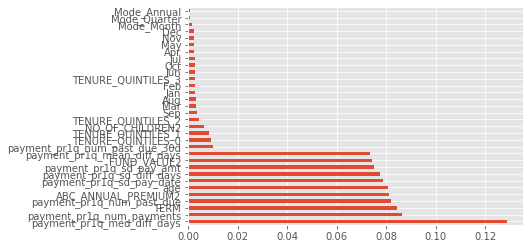

In [156]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
matplotlib.style.use('ggplot')
final_trainset = pd.read_csv('E:\\final_dataset.csv')
y=final_trainset['lapse_var']
final_trainset=final_trainset.drop(['lapse_var'],axis=1)
x=final_trainset.iloc[:,1:]
1:
model = RandomForestClassifier(n_estimators=100, min_samples_leaf=8, random_state=1)
model.fit(x, y)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(32).plot(kind='barh')

In [167]:
z_trainset = final_trainset.iloc[:,1:]
x_train, x_test, y_train, y_test = train_test_split(z_trainset, y, test_size=0.2, random_state=42)

In [170]:
clf1 = RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=2, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
model.fit(x_train,y_train)
preds = model.predict(x_test)
report = classification_report(y_test, preds)
matrix = confusion_matrix(y_test, preds)
print(matrix)
print(report)
# count = 0
# for i in range(12002):
#     if preds[i] == 1:
#         count += 1
# print(count)

[[11191     0]
 [  811     0]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.97     11191
           1       0.00      0.00      0.00       811

    accuracy                           0.93     12002
   macro avg       0.47      0.50      0.48     12002
weighted avg       0.87      0.93      0.90     12002



c:\users\kavinda\anaconda3\envs\opencv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


IndexError: index 12002 is out of bounds for axis 0 with size 12002

In [162]:

final_trainset.iloc[:,[19]]

,payment_pr1q_num_payments
0,8.065577
1,4.935046
2,5.499367
3,6.518387
4,1.775785
...,...
60002,5.467595
60003,1.947457
60004,3.189202
60005,3.412002


In [255]:
from sklearn import neighbors, linear_model
from sklearn.metrics import classification_report
# Set the the number of neighbors for k-NN 
n_neig = 8
# Set sc = True if you want to scale your features 
sc = False 
# Load data 
# df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv ' , sep = ';') 
# X = df.drop('quality' , 1).values 
# drop target variable 
# Here we scale, if desired 
# if sc == True: X = scale(X) 
# Target value
# y1 = df['quality'].values 
# original target variable 
# y = y1 <= 5 
# new target variable: is the rating <= 5? 
# Split the data into a test set and a training set 
X_train, X_test, y_train, y_test = train_test_split(z_trainset, y, test_size=0.2, random_state=42) 
# Train k-NN model and print performance on the test set 
knn = neighbors.KNeighborsClassifier(n_neighbors = n_neig) 
knn_model = knn.fit(X_train, y_train) 
y_true, y_pred = y_test, knn_model.predict(X_test)
print('k-NN accuracy for test set: %f' % knn_model.score(X_test, y_test)) 
print(classification_report(y_true, y_pred)) 

k-NN accuracy for test set: 0.932428
              precision    recall  f1-score   support

           0       0.93      1.00      0.97     11191
           1       0.00      0.00      0.00       811

    accuracy                           0.93     12002
   macro avg       0.47      0.50      0.48     12002
weighted avg       0.87      0.93      0.90     12002



c:\users\kavinda\anaconda3\envs\opencv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [256]:
count = 0
for i in range(12002):
    if y_pred[i] == 1:
        count += 1
print(count)

0


In [257]:
report = classification_report(y_true, y_pred)

In [258]:
matrix = confusion_matrix(y_true, y_pred)
print(matrix)

[[11191     0]
 [  811     0]]


In [262]:
final_trainset.iloc[:,[25,20,19,21,23,17,22,24,31,18,26,32]]

,payment_pr1q_mean_diff_days,payment_pr1q_num_past_due,payment_pr1q_num_payments,payment_pr1q_sd_pay_date,payment_pr1q_sd_diff_days,age,ABC_ANNUAL_PREMIUM2,payment_pr1q_med_diff_days,payment_pr1q_sd_pay_amt,TERM,FUND_VALUE2,payment_pr1q_num_past_due_30d
0,46.854693,3.871131,8.065577,6.927565,52.960115,59.703765,14847.775340,95.810812,6087.007464,13.533617,1.251947e+07,1.0
1,46.215029,4.037578,4.935046,5.751818,8.775671,49.183609,18127.102540,47.964398,3050.669914,13.750541,3.790000e+07,0.0
2,14.498615,0.947059,5.499367,8.148305,40.504105,46.821003,103898.557300,52.123828,11687.537130,21.999173,1.235961e+07,1.0
3,23.824406,4.033237,6.518387,12.255236,19.587609,29.872764,69416.253665,40.171606,11349.370640,24.802638,6.667302e+06,0.0
4,0.931913,1.107156,1.775785,4.362300,8.756755,36.998385,68452.107019,48.383747,8186.397688,15.552943,1.232416e+07,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
60002,50.412955,4.136871,5.467595,1.810030,37.885844,29.838690,180299.313400,47.410430,6061.437250,21.835799,1.530000e+07,1.0
60003,39.284992,1.068679,1.947457,2.280073,68.550539,48.442519,168677.035200,90.992461,8937.487299,18.919716,1.258011e+07,1.0
60004,26.433686,3.648770,3.189202,1.364022,36.576560,61.568204,72870.859220,97.129089,5937.025298,34.112120,8.939695e+06,0.0
60005,73.894707,0.487497,3.412002,7.729683,37.153049,39.878620,46153.087080,47.403801,2241.004176,20.903099,2.040000e+07,0.0


In [6]:
z_trainset = trainset3.iloc[:,[]]
y = trainset3['lapse_var']

In [12]:
from sklearn import neighbors, linear_model
from sklearn.metrics import classification_report
# Set the the number of neighbors for k-NN 
n_neig = 5
# Set sc = True if you want to scale your features 
sc = False 
# Load data 
# df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv ' , sep = ';') 
# X = df.drop('quality' , 1).values 
# drop target variable 
# Here we scale, if desired 
# if sc == True: X = scale(X) 
# Target value
# y1 = df['quality'].values 
# original target variable 
# y = y1 <= 5 
# new target variable: is the rating <= 5? 
# Split the data into a test set and a training set 
X_train, X_test, y_train, y_test = train_test_split(z_trainset, y, test_size=0.2, random_state=30) 

# smt = SMOTE()
# X_train, y_train = smt.fit_sample(X_train, y_train)
# p = np.bincount(y_train)
# print(p)
# print(len(y_train))

# Train k-NN model and print performance on the test set 
knn = neighbors.KNeighborsClassifier(n_jobs=-2,algorithm='auto',metric_params=None,leaf_size=500,n_neighbors = 1, p = 9) 
knnt = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
knn_model = knn.fit(X_train, y_train) 
y_true, y_pred = y_test, knn_model.predict(X_test)
print('k-NN accuracy for test set: %f' % knn_model.score(X_test, y_test)) 
print(classification_report(y_true, y_pred)) 

matrix = confusion_matrix(y_true, y_pred)
print(matrix)

k-NN accuracy for test set: 0.851730
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     44112
           1       0.08      0.07      0.07      3895

    accuracy                           0.85     48007
   macro avg       0.50      0.50      0.50     48007
weighted avg       0.85      0.85      0.85     48007

[[40601  3511]
 [ 3607   288]]


In [358]:
neighbors.KNeighborsClassifier()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [352]:
to_predict_age_set.to_csv("E:\\random1.csv")

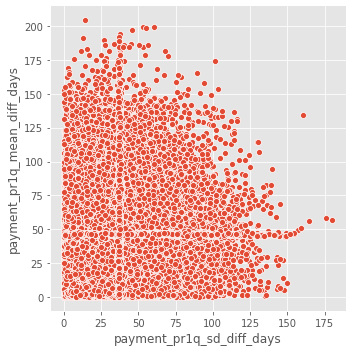

In [374]:
import seaborn as sns
sns.relplot(x="payment_pr1q_sd_diff_days", y="payment_pr1q_mean_diff_days", data=final_set)

In [491]:
z_trainset = trainset3.iloc[:,1:34]

In [492]:
z_trainset

,payment_pr1q_mean_diff_days,payment_pr1q_num_payments,FUND_VALUE2,Mode_Month,payment_pr1q_med_diff_days,payment_pr1q_sd_diff_days,payment_pr1q_num_past_due,payment_pr1q_num_past_due_30d,Mode_Annual,payment_pr1q_sd_pay_amt,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,-4.151475,8.065577,-2.530957e+06,1,95.810812,52.960115,3.871131,1,0,-1540.834997,...,0,0,1,0,0,0,0,0,0,0
1,-5.476620,4.935046,3.790000e+07,1,-20.876256,8.775671,4.037578,0,0,3050.669914,...,1,0,0,0,0,0,0,0,0,0
2,14.498615,5.499367,-2.550000e+07,1,52.123828,40.504105,0.947059,1,0,11687.537130,...,0,0,0,0,0,0,0,0,0,0
3,23.824406,6.518387,6.667302e+06,1,40.171606,19.587609,4.033237,0,0,11349.370640,...,1,0,0,0,0,0,0,0,0,0
4,0.931913,1.775785,-9.972933e+06,1,-58.912534,8.756755,1.107156,1,0,8186.397688,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240027,15.447571,1.173408,7.902722e+06,1,-5.684554,-1.649581,3.047634,0,0,3228.267349,...,0,0,1,0,0,0,0,0,0,0
240028,116.038481,0.817222,1.370000e+07,1,64.333780,7.476007,-0.468213,0,0,30.404755,...,0,0,0,0,1,0,0,0,0,0
240029,26.359274,3.661044,3.449327e+05,1,104.755195,-19.749293,5.634498,1,0,5948.266210,...,0,0,0,0,0,1,0,0,0,0
240030,-36.088327,2.467479,-3.090000e+07,1,39.508509,13.109649,2.085475,0,1,-9510.648763,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
matplotlib.style.use('ggplot')
final_trainset = pd.read_csv('E:\\final_dataset.csv')
y=lapse_var
final_trainset=final_trainset.drop(['lapse_var'],axis=1)
x=z_trainset
model = RandomForestClassifier(n_estimators=100, min_samples_leaf=8, random_state=1)
model.fit(x, y)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(32).plot(kind='barh')

In [5]:
trainset3.iloc[:,1:34]

,payment_pr1q_mean_diff_days,payment_pr1q_num_payments,FUND_VALUE2,Mode_Month,payment_pr1q_med_diff_days,payment_pr1q_sd_diff_days,payment_pr1q_num_past_due,payment_pr1q_num_past_due_30d,Mode_Annual,payment_pr1q_sd_pay_amt,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,-4.151475,8.065577,-2.530957e+06,1,95.810812,52.960115,3.871131,1,0,-1540.834997,...,0,0,1,0,0,0,0,0,0,0
1,-5.476620,4.935046,3.790000e+07,1,-20.876256,8.775671,4.037578,0,0,3050.669914,...,1,0,0,0,0,0,0,0,0,0
2,14.498615,5.499367,-2.550000e+07,1,52.123828,40.504105,0.947059,1,0,11687.537130,...,0,0,0,0,0,0,0,0,0,0
3,23.824406,6.518387,6.667302e+06,1,40.171606,19.587609,4.033237,0,0,11349.370640,...,1,0,0,0,0,0,0,0,0,0
4,0.931913,1.775785,-9.972933e+06,1,-58.912534,8.756755,1.107156,1,0,8186.397688,...,0,0,0,0,0,0,1,0,0,0
5,-22.163258,2.688417,2.070000e+07,1,126.528610,42.478879,0.769801,1,0,6181.590677,...,0,0,0,0,0,0,1,0,0,0
6,52.431916,-0.272151,7.567418e+06,0,51.859362,-64.109020,3.877532,1,0,-5270.475590,...,0,0,0,0,0,0,1,0,0,0
7,-17.336019,0.025436,2.580000e+07,1,52.567276,77.082352,0.455193,1,0,7927.931607,...,0,0,1,0,0,0,0,0,0,0
8,-17.728233,1.101131,-6.636662e+06,1,15.480426,-15.653784,3.004976,0,0,-16805.245680,...,1,0,0,0,0,0,0,0,0,0
9,-18.548074,0.407311,4.787733e+06,0,-3.593384,3.788942,0.994515,1,0,-5773.927379,...,1,0,0,0,0,0,0,0,0,0


In [10]:
trainset3

,ID,payment_pr1q_mean_diff_days,payment_pr1q_num_payments,FUND_VALUE2,Mode_Month,payment_pr1q_med_diff_days,payment_pr1q_sd_diff_days,payment_pr1q_num_past_due,payment_pr1q_num_past_due_30d,Mode_Annual,...,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,lapse_var
0,1,-4.151475,8.065577,-2.530957e+06,1,95.810812,52.960115,3.871131,1,0,...,0,1,0,0,0,0,0,0,0,0
1,2,-5.476620,4.935046,3.790000e+07,1,-20.876256,8.775671,4.037578,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,14.498615,5.499367,-2.550000e+07,1,52.123828,40.504105,0.947059,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,23.824406,6.518387,6.667302e+06,1,40.171606,19.587609,4.033237,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0.931913,1.775785,-9.972933e+06,1,-58.912534,8.756755,1.107156,1,0,...,0,0,0,0,0,1,0,0,0,0
5,6,-22.163258,2.688417,2.070000e+07,1,126.528610,42.478879,0.769801,1,0,...,0,0,0,0,0,1,0,0,0,0
6,7,52.431916,-0.272151,7.567418e+06,0,51.859362,-64.109020,3.877532,1,0,...,0,0,0,0,0,1,0,0,0,0
7,8,-17.336019,0.025436,2.580000e+07,1,52.567276,77.082352,0.455193,1,0,...,0,1,0,0,0,0,0,0,0,0
8,9,-17.728233,1.101131,-6.636662e+06,1,15.480426,-15.653784,3.004976,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,-18.548074,0.407311,4.787733e+06,0,-3.593384,3.788942,0.994515,1,0,...,0,0,0,0,0,0,0,0,0,0
